In [3]:
users_interests = [
    ["Hadoop", "Big Data", "HBase", "Java", "Spark", "Storm", "Cassandra"],
    ["NoSQL", "MongoDB", "Cassandra", "HBase", "Postgres"],
    ["Python", "scikit-learn", "scipy", "numpy", "statsmodels", "pandas"],
    ["R", "Python", "statistics", "regression", "probability"],
    ["machine learning", "regression", "decision trees", "libsvm"],
    ["Python", "R", "Java", "C++", "Haskell", "programming languages"],
    ["statistics", "probability", "mathematics", "theory"],
    ["machine learning", "scikit-learn", "Mahout", "neural networks"],
    ["neural networks", "deep learning", "Big Data", "artificial intelligence"],
    ["Hadoop", "Java", "MapReduce", "Big Data"],
    ["statistics", "R", "statsmodels"],
    ["C++", "deep learning", "artificial intelligence", "probability"],
    ["pandas", "R", "Python"],
    ["databases", "HBase", "Postgres", "MySQL", "MongoDB"],
    ["libsvm", "regression", "support vector machines"]
]

from collections import Counter

popular_interests = Counter(interest for user_interests in users_interests for interest in user_interests)



In [11]:
# recommending the most popular interest

from typing import List, Tuple

def most_popular_new_interest(user_interests: List[str],
                             max_results: int  = 5) -> List[Tuple[str, int]]:
    suggestions = [(interest, frequency) for interest, frequency in popular_interests.most_common()
                  if interest not in user_interests]
    
    return suggestions[:max_results]

most_popular_new_interest(users_interests[3])

[('Big Data', 3), ('HBase', 3), ('Java', 3), ('Hadoop', 2), ('Cassandra', 2)]

In [14]:
unique_interests = sorted({interest for user_interests in users_interests
                          for interest in user_interests})

unique_interests

['Big Data',
 'C++',
 'Cassandra',
 'HBase',
 'Hadoop',
 'Haskell',
 'Java',
 'Mahout',
 'MapReduce',
 'MongoDB',
 'MySQL',
 'NoSQL',
 'Postgres',
 'Python',
 'R',
 'Spark',
 'Storm',
 'artificial intelligence',
 'databases',
 'decision trees',
 'deep learning',
 'libsvm',
 'machine learning',
 'mathematics',
 'neural networks',
 'numpy',
 'pandas',
 'probability',
 'programming languages',
 'regression',
 'scikit-learn',
 'scipy',
 'statistics',
 'statsmodels',
 'support vector machines',
 'theory']

In [36]:

def make_user_interest_vector(user_interests: List[str]) -> List[int]:
    """Given a list of interests, produce a vector whose ith element is 1 if unique_interest[i]
    is in the list, else 0"""
    
    # create a list of zeros for all unique interests    
    return [1 if interest in user_interests else 0 for interest in unique_interests ]

user_interest_vectors = [make_user_interest_vector(user_interests) for user_interests in users_interests]

from vector_operations import Vector, dot
import math
def cosine_similarity(v1: Vector, v2: Vector) -> float:
    return dot(v1, v2)/math.sqrt(dot(v1,v1) * dot(v2,v2))

user_similarities = [[cosine_similarity(interest_vector_i, interest_vector_j)
                    for interest_vector_j in user_interest_vectors]
                    for interest_vector_i in user_interest_vectors]

print(f"user_similarities[0][9] = {user_similarities[0][9]}")
print(f"user_similarities[0][8] = {user_similarities[0][8]}")

user_similarities[0][9] = 0.5669467095138409
user_similarities[0][8] = 0.1889822365046136


In [41]:
# find most similar users

def most_similar_users_to(user_id: int) -> List[Tuple[int, float]]:
    pairs = [(other_user_id, similarity)
            for other_user_id, similarity in enumerate(user_similarities[user_id])
            if user_id != other_user_id and similarity >0]
    
    return sorted(pairs, key = lambda pair: pair[-1], reverse = True)

most_similar_users_to(0)

[(9, 0.5669467095138409),
 (1, 0.3380617018914066),
 (8, 0.1889822365046136),
 (13, 0.1690308509457033),
 (5, 0.1543033499620919)]

In [44]:
from collections import defaultdict

def user_based_suggestions(user_id: int,
                          include_current_interests: bool = False):
    # Sum up the similarities
    suggestions: Dict[str, float] = defaultdict(float)
    
    for other_user_id, similarity in most_similar_users_to(user_id):
        for interest in users_interests[other_user_id]:
            suggestions[interest] += similarity
            
    # convert them to sorted list
    
    suggestions = sorted(suggestions.items(), key = lambda pair: pair[-1], reverse = True)
    
    # And optionally remove already interests
    
    if include_current_interests:
        return suggestions
    else:
        return [(suggestions, weight) for suggestion, weight in suggestions
               if suggestion not in users_interests[user_id]]
    
user_based_suggestions(0)

[([('Big Data', 0.7559289460184544),
   ('Java', 0.7212500594759328),
   ('Hadoop', 0.5669467095138409),
   ('MapReduce', 0.5669467095138409),
   ('MongoDB', 0.50709255283711),
   ('HBase', 0.50709255283711),
   ('Postgres', 0.50709255283711),
   ('NoSQL', 0.3380617018914066),
   ('Cassandra', 0.3380617018914066),
   ('neural networks', 0.1889822365046136),
   ('deep learning', 0.1889822365046136),
   ('artificial intelligence', 0.1889822365046136),
   ('databases', 0.1690308509457033),
   ('MySQL', 0.1690308509457033),
   ('Python', 0.1543033499620919),
   ('R', 0.1543033499620919),
   ('C++', 0.1543033499620919),
   ('Haskell', 0.1543033499620919),
   ('programming languages', 0.1543033499620919)],
  0.5669467095138409),
 ([('Big Data', 0.7559289460184544),
   ('Java', 0.7212500594759328),
   ('Hadoop', 0.5669467095138409),
   ('MapReduce', 0.5669467095138409),
   ('MongoDB', 0.50709255283711),
   ('HBase', 0.50709255283711),
   ('Postgres', 0.50709255283711),
   ('NoSQL', 0.33806170

In [50]:
interest_user_matrix = [[user_interest_vector[j] for user_interest_vector in user_interest_vectors]
                       for j, _ in enumerate(unique_interests)]

interest_user_matrix

[[1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,

In [57]:
interest_similarities = [[cosine_similarity(user_vector_i, user_vector_j) 
                         for user_vector_j in interest_user_matrix]
                        for user_vector_i in interest_user_matrix]


def most_similar_interests_to(interest_id: int):
    similarities = interest_similarities[interest_id]
    pairs = [(unique_interests[other_interest_id], similarity)
            for other_interest_id, similarity in enumerate(similarities)
            if interest_id != other_interest_id and similarity > 0]
    
    return sorted(pairs, key = lambda pair: pair[-1], reverse = True)

most_similar_interests_to(0)

[('Hadoop', 0.8164965809277261),
 ('Java', 0.6666666666666666),
 ('MapReduce', 0.5773502691896258),
 ('Spark', 0.5773502691896258),
 ('Storm', 0.5773502691896258),
 ('Cassandra', 0.4082482904638631),
 ('artificial intelligence', 0.4082482904638631),
 ('deep learning', 0.4082482904638631),
 ('neural networks', 0.4082482904638631),
 ('HBase', 0.3333333333333333)]

In [61]:
def item_based_suggestions(user_id: int,
                          include_current_interests: bool = False):
    
    # Add up the similar interests
    suggestions = defaultdict(float)
    
    user_interest_vector = user_interest_vectors[user_id]
    
    for interest_id, is_interested in enumerate(user_interest_vector):
        if is_interested == 1:
            similar_interests = most_similar_interests_to(interest_id)
            for interest, similarity in similar_interests:
                suggestions[interest] += similarity
                
    # sort them by weight
    suggestions = sorted(suggestions.items(), key = lambda pair: pair[-1], reverse = True)
    
    if include_current_interests:
        return suggestions
    else:
        return [(suggestion, weight) for suggestion, weight in suggestions
               if suggestion not in users_interests[user_id]]
    
item_based_suggestions(0)

[('MapReduce', 1.861807319565799),
 ('MongoDB', 1.3164965809277263),
 ('Postgres', 1.3164965809277263),
 ('NoSQL', 1.2844570503761732),
 ('MySQL', 0.5773502691896258),
 ('databases', 0.5773502691896258),
 ('Haskell', 0.5773502691896258),
 ('programming languages', 0.5773502691896258),
 ('artificial intelligence', 0.4082482904638631),
 ('deep learning', 0.4082482904638631),
 ('neural networks', 0.4082482904638631),
 ('C++', 0.4082482904638631),
 ('Python', 0.2886751345948129),
 ('R', 0.2886751345948129)]

In [71]:
MOVIES = "./ml-100k/u.item"
RATINGS = "./ml-100k/u.data"

from typing import NamedTuple

class Rating(NamedTuple):
    user_id: str
    movie_id: str
    rating: float
        
import csv
with open(MOVIES, encoding="iso-8859-1") as f:
        reader = csv.reader(f, delimiter="|")
        movies = {movie_id: title for movie_id, title, *_ in reader}
        
# Create a list of [Rating]
with open(RATINGS, encoding="iso-8859-1") as f:
    reader = csv.reader(f, delimiter="\t")
    ratings = [Rating(user_id, movie_id, float(rating))
                   for user_id, movie_id, rating, _ in reader]
    
print(len(movies))
print(len(list({rating.user_id for rating in ratings})))

1682
943


In [73]:
import re

# Data structure for accumulating ratings by movie_id
star_wars_ratings = {movie_id: []
                         for movie_id, title in movies.items()
                         if re.search("Star Wars|Empire Strikes|Jedi", title)}

# Iterate over ratings, accumulating the Star Wars ones
for rating in ratings:
    if rating.movie_id in star_wars_ratings:
        star_wars_ratings[rating.movie_id].append(rating.rating)
    
# Compute the average rating for each movie
avg_ratings = [(sum(title_ratings) / len(title_ratings), movie_id)
                   for movie_id, title_ratings in star_wars_ratings.items()]
    
# And then print them in order
for avg_rating, movie_id in sorted(avg_ratings, reverse=True):
    print(f"{avg_rating:.2f} {movies[movie_id]}")

4.36 Star Wars (1977)
4.20 Empire Strikes Back, The (1980)
4.01 Return of the Jedi (1983)


In [75]:
import random
random.seed(0)
random.shuffle(ratings)
    
split1 = int(len(ratings) * 0.7)
split2 = int(len(ratings) * 0.85)
    
train = ratings[:split1]              # 70% of the data
validation = ratings[split1:split2]   # 15% of the data
test = ratings[split2:]               # 15% of the data
    
avg_rating = sum(rating.rating for rating in train) / len(train)
baseline_error = sum((rating.rating - avg_rating) ** 2
                         for rating in test) / len(test)
baseline_error    

1.2694843860544733

In [76]:
# Embedding vectors for matrix factorization model
    
from deep_learning import random_tensor
    
EMBEDDING_DIM = 2
    
# Find unique ids
user_ids = {rating.user_id for rating in ratings}
movie_ids = {rating.movie_id for rating in ratings}
    
# Then create a random vector per id
user_vectors = {user_id: random_tensor(EMBEDDING_DIM)
                    for user_id in user_ids}
movie_vectors = {movie_id: random_tensor(EMBEDDING_DIM)
                     for movie_id in movie_ids}
    

shape([1,2,3]) = [3]
shape([[1,2],[3,4],[5,6]]) = [3, 2]
shape([[[1,2,3], [4,5,6]],[[7,8,9],[10,11,12]],[[15,16,17],[18,19,20]]]) = [3, 2, 3]
is_1d([1,2,3]) = True
is_1d([[1,2],[3,4]]) = False
tensor_apply(lambda x: x + 1, [1,2,3]) = [2, 3, 4]
tensor_apply(lambda x: 2*x, [[1,2],[3,4]]) = [[2, 4], [6, 8]]
zero_like([1,2,3]) = [0.0, 0.0, 0.0]
zero_like([[1,2],[3,4]]) = [[0.0, 0.0], [0.0, 0.0]]
tensor_combine(operator.add, [1,2,3], [4,5,6]) = [5, 7, 9]
perceptron_output(and_weights, and_bias, [1, 1]) = 1.0
perceptron_output(and_weights, and_bias, [0, 1]) = 0.0
perceptron_output(and_weights, and_bias, [1, 0]) = 0.0
perceptron_output(and_weights, and_bias, [0, 0]) = 0.0
perceptron_output(or_weights, or_bias, [1, 1]) = 1.0
perceptron_output(or_weights, or_bias, [0, 1]) = 1.0
perceptron_output(or_weights, or_bias, [1, 0]) = 1.0
perceptron_output(or_weights, or_bias, [0, 0]) = 0.0
perceptron_output(not_weights, not_bias, [1]) = 0.0
perceptron_output(not_weights, not_bias, [0]) = 1.0


<Figure size 640x480 with 1 Axes>

feed_forward(xor_network, [1, 1]) = 0.9999999999999065
feed_forward(xor_network, [0, 1]) = 0.9999999999999059
feed_forward(xor_network, [1, 0]) = 0.9999999999999061
feed_forward(xor_network, [0, 0]) = 9.38314668300676e-14


<Figure size 640x480 with 1 Axes>

0 [1.634287973318611, 7.99901254982857, 0.09186237402084903]
1 [1.6016022138522388, 7.839032298831999, 0.09002512654043204]
2 [1.569570169575194, 7.682251652855359, 0.0882246240096234]
3 [1.53817876618369, 7.528606619798252, 0.08646013152943094]
4 [1.5074151908600162, 7.378034487402287, 0.08473092889884232]
5 [1.4772668870428158, 7.230473797654241, 0.08303631032086548]
6 [1.4477215493019595, 7.085864321701156, 0.08137558411444816]
7 [1.4187671183159203, 6.944147035267133, 0.0797480724321592]
8 [1.3903917759496018, 6.805264094561791, 0.07815311098351602]
9 [1.3625839404306097, 6.669158812670555, 0.0765900487638457]
10 [1.3353322616219976, 6.535775636417144, 0.07505824778856879]
11 [1.3086256163895575, 6.405060123688801, 0.07355708283279741]
12 [1.2824531040617664, 6.276958921215025, 0.07208594117614146]
13 [1.256804041980531, 6.151419742790725, 0.07064422235261864]
14 [1.2316679611409205, 6.02839134793491, 0.06923133790556626]
15 [1.207034601918102, 5.907823520976212, 0.0678467111474549

614 [6.700991390473985e-06, 3.2797961622302685e-05, 3.766588186855637e-07]
615 [6.566971562664505e-06, 3.2142002389856635e-05, 3.6912564231185243e-07]
616 [6.435632131411215e-06, 3.1499162342059505e-05, 3.6174312946561536e-07]
617 [6.3069194887829906e-06, 3.0869179095218316e-05, 3.5450826687630304e-07]
618 [6.1807810990073306e-06, 3.025179551331395e-05, 3.47418101538777e-07]
619 [6.057165477027184e-06, 2.964675960304767e-05, 3.4046973950800143e-07]
620 [5.936022167486641e-06, 2.9053824410986717e-05, 3.336603447178414e-07]
621 [5.817301724136908e-06, 2.8472747922766984e-05, 3.2698713782348457e-07]
622 [5.700955689654169e-06, 2.7903292964311644e-05, 3.204473950670149e-07]
623 [5.586936575861086e-06, 2.7345227105025412e-05, 3.1403844716567457e-07]
624 [5.475197844343865e-06, 2.6798322562924904e-05, 3.0775767822236107e-07]
625 [5.3656938874569875e-06, 2.6262356111666407e-05, 3.0160252465791383e-07]
626 [5.258380009707848e-06, 2.573710898943308e-05, 2.9557047416475555e-07]
627 [5.1532124095

199 [19.99818856510455, 1.9839598111278833]
200 [19.998192186886396, 1.9899900800707322]
201 [19.998195801426846, 1.996008292097477]
202 [19.99819940874039, 2.002014471314709]
203 [19.998203008841475, 2.00800864178082]
204 [19.998206601744517, 2.0139908275061]
205 [19.998210187463915, 2.019961052452832]
206 [19.998213766014022, 2.0259193405353906]
207 [19.998217337409184, 2.031865715620334]
208 [19.998220901663693, 2.0378002015265024]
209 [19.998224458791842, 2.043722822025113]
210 [19.998228008807867, 2.049633600839855]
211 [19.998231551725993, 2.055532561646983]
212 [19.99823508756041, 2.061419728075415]
213 [19.99823861632528, 2.0672951237068244]
214 [19.998242138034744, 2.073158772075736]
215 [19.998245652702902, 2.079010696669619]
216 [19.998249160343835, 2.0848509209289827]
217 [19.99825266097159, 2.0906794682474685]
218 [19.998256154600195, 2.096496361971945]
219 [19.998259641243642, 2.1023016254026015]
220 [19.998263120915894, 2.10809528179304]
221 [19.99826659363089, 2.1138773

520 [19.99904718106405, 3.4135558993809343]
521 [19.99904908612966, 3.4167278347632366]
522 [19.99905098738628, 3.4198934281798397]
523 [19.999052884841532, 3.423052692310866]
524 [19.99905477850301, 3.426205639811086]
525 [19.999056668378305, 3.4293522833099668]
526 [19.99905855447498, 3.4324926354117253]
527 [19.999060436800598, 3.435626708695377]
528 [19.999062315362696, 3.4387545157147867]
529 [19.999064190168795, 3.44187606899872]
530 [19.99906606122641, 3.444991381050891]
531 [19.999067928543035, 3.448100464350016]
532 [19.999069792126146, 3.451203331349859]
533 [19.99907165198321, 3.4542999944792854]
534 [19.99907350812168, 3.45739046614231]
535 [19.999075360548982, 3.460474758718147]
536 [19.999077209272546, 3.4635528845612598]
537 [19.999079054299774, 3.4666248560014097]
538 [19.999080895638052, 3.4696906853437066]
539 [19.999082733294763, 3.4727503848686574]
540 [19.99908456727726, 3.4758039668322147]
541 [19.999086397592897, 3.4788514434658273]
542 [19.999088224249004, 3.481

987 [19.999625807381705, 4.376969065794908]
988 [19.999626555542196, 4.3782147534707]
989 [19.999627302206825, 4.379457950519301]
990 [19.999628047378568, 4.380698661920469]
991 [19.999628791060417, 4.381936892644007]
992 [19.999629533255344, 4.383172647649779]
993 [19.999630273966336, 4.384405931887735]
994 [19.999631013196343, 4.385636750297926]
995 [19.99963175094834, 4.386865107810526]
996 [19.99963248722527, 4.388091009345853]
997 [19.99963322203009, 4.389314459814386]
998 [19.999633955365745, 4.3905354641167875]
999 [19.999634687235165, 4.39175402714392]
1000 [19.99963541764129, 4.392970153776867]
1001 [19.999636146587036, 4.3941838488869545]
1002 [19.999636874075332, 4.3953951173357675]
1003 [19.99963760010909, 4.3966039639751715]
1004 [19.99963832469121, 4.3978103936473305]
1005 [19.99963904782461, 4.399014411184727]
1006 [19.99963976951217, 4.400216021410182]
1007 [19.999640489756793, 4.401415229136874]
1008 [19.999641208561357, 4.402612039168357]
1009 [19.999641925928742, 4.4

1441 [19.999849172817676, 4.748872650844232]
1442 [19.999849474381456, 4.749374754715362]
1443 [19.999849775342284, 4.749875854680313]
1444 [19.999850075701378, 4.750375952746294]
1445 [19.99985037545993, 4.750875050916503]
1446 [19.999850674619143, 4.75137315119013]
1447 [19.999850973180223, 4.751870255562369]
1448 [19.999851271144355, 4.752366366024424]
1449 [19.99985156851274, 4.75286148456352]
1450 [19.999851865286566, 4.753355613162906]
1451 [19.999852161467025, 4.753848753801867]
1452 [19.999852457055297, 4.75434090845573]
1453 [19.999852752052572, 4.754832079095874]
1454 [19.999853046460032, 4.755322267689735]
1455 [19.999853340278847, 4.755811476200815]
1456 [19.99985363351021, 4.756299706588693]
1457 [19.99985392615528, 4.756786960809025]
1458 [19.999854218215237, 4.7572732408135625]
1459 [19.99985450969125, 4.757758548550151]
1460 [19.999854800584487, 4.758242885962742]
1461 [19.99985509089611, 4.758726254991402]
1462 [19.999855380627288, 4.759208657572315]
1463 [19.999855669

1776 [19.999922856648173, 4.871556272874147]
1777 [19.999923010888544, 4.871813083185047]
1778 [19.999923164820526, 4.872069380029565]
1779 [19.99992331844474, 4.872325164434327]
1780 [19.999923471761793, 4.872580437423903]
1781 [19.999923624772308, 4.872835200020816]
1782 [19.99992377747689, 4.873089453245547]
1783 [19.99992392987616, 4.873343198116533]
1784 [19.99992408197072, 4.873596435650176]
1785 [19.99992423376118, 4.873849166860847]
1786 [19.999924385248153, 4.8741013927608865]
1787 [19.999924536432243, 4.874353114360613]
1788 [19.999924687314056, 4.874604332668324]
1789 [19.99992483789419, 4.874855048690301]
1790 [19.999924988173266, 4.8751052634308145]
1791 [19.999925138151863, 4.875354977892126]
1792 [19.9999252878306, 4.875604193074493]
1793 [19.999925437210063, 4.8758529099761745]
1794 [19.999925586290864, 4.876101129593432]
1795 [19.99992573507359, 4.876348852920536]
1796 [19.999925883558838, 4.876596080949769]
1797 [19.999926031747204, 4.876842814671428]
1798 [19.9999261

2134 [19.999962318702163, 4.937260616472623]
2135 [19.99996239404213, 4.93738605755838]
2136 [19.99996246923146, 4.937511247837306]
2137 [19.999962544270453, 4.937636187810863]
2138 [19.99996261915942, 4.937760877979512]
2139 [19.99996269389865, 4.937885318842713]
2140 [19.999962768488444, 4.938009510898926]
2141 [19.999962842929108, 4.938133454645617]
2142 [19.99996291722093, 4.938257150579255]
2143 [19.999962991364217, 4.938380599195318]
2144 [19.999963065359264, 4.938503800988292]
2145 [19.99996313920636, 4.938626756451674]
2146 [19.999963212905808, 4.938749466077977]
2147 [19.999963286457906, 4.938871930358727]
2148 [19.999963359862935, 4.938994149784468]
2149 [19.999963433121206, 4.9391161248447615]
2150 [19.999963506233, 4.9392378560281935]
2151 [19.999963579198617, 4.93935934382237]
2152 [19.999963652018344, 4.939480588713924]
2153 [19.999963724692478, 4.939601591188515]
2154 [19.999963797221305, 4.93972235173083]
2155 [19.99996386960512, 4.93984287082459]
2156 [19.9999639418442

2581 [19.99998459737876, 4.974354626386692]
2582 [19.999984628174754, 4.974405901731298]
2583 [19.99998465890917, 4.9744570745560095]
2584 [19.99998468958214, 4.974508145065807]
2585 [19.99998472019378, 4.974559113465257]
2586 [19.999984750744215, 4.974609979958521]
2587 [19.999984781233568, 4.974660744749348]
2588 [19.99998481166196, 4.974711408041083]
2589 [19.999984842029512, 4.9747619700366625]
2590 [19.999984872336352, 4.974812430938619]
2591 [19.999984902582593, 4.974862790949078]
2592 [19.99998493276836, 4.9749130502697625]
2593 [19.999984962893773, 4.9749632091019915]
2594 [19.999984992958957, 4.975013267646681]
2595 [19.999985022964022, 4.975063226104347]
2596 [19.999985052909103, 4.975113084675103]
2597 [19.999985082794304, 4.975162843558662]
2598 [19.999985112619758, 4.9752125029543395]
2599 [19.999985142385576, 4.9752620630610505]
2600 [19.999985172091883, 4.975311524077314]
2601 [19.99998520173879, 4.97536088620125]
2602 [19.999985231326427, 4.975410149630587]
2603 [19.999

3121 [19.999994773294077, 4.991297531497889]
3122 [19.99999478374435, 4.991314931208187]
3123 [19.999994794173727, 4.991332296129515]
3124 [19.999994804582254, 4.991349626331429]
3125 [19.999994814969966, 4.9913669218833485]
3126 [19.999994825336916, 4.991384182854552]
3127 [19.999994835683133, 4.99140140931418]
3128 [19.999994846008665, 4.991418601331234]
3129 [19.999994856313553, 4.99143575897458]
3130 [19.999994866597834, 4.991452882312944]
3131 [19.999994876861557, 4.991469971414916]
3132 [19.999994887104755, 4.991487026348947]
3133 [19.99999489732748, 4.991504047183354]
3134 [19.999994907529754, 4.991521033986315]
3135 [19.99999491771164, 4.991537986825872]
3136 [19.999994927873164, 4.991554905769932]
3137 [19.99999493801437, 4.991571790886265]
3138 [19.9999949481353, 4.991588642242507]
3139 [19.999994958235998, 4.9916054599061574]
3140 [19.999994968316496, 4.991622243944581]
3141 [19.99999497837684, 4.991638994425009]
3142 [19.999994988417072, 4.991655711414536]
3143 [19.99999499

3683 [19.999998302776042, 4.997174121091927]
3684 [19.999998306169473, 4.997179771152519]
3685 [19.999998309556112, 4.9971854099163835]
3686 [19.99999831293599, 4.997191037406107]
3687 [19.999998316309103, 4.99719665364423]
3688 [19.999998319675473, 4.9972022586532505]
3689 [19.99999832303511, 4.997207852455619]
3690 [19.999998326388038, 4.997213435073744]
3691 [19.999998329734254, 4.997219006529984]
3692 [19.999998333073783, 4.997224566846659]
3693 [19.999998336406634, 4.9972301160460395]
3694 [19.999998339732823, 4.997235654150354]
3695 [19.999998343052358, 4.997241181181787]
3696 [19.99999834636526, 4.997246697162476]
3697 [19.999998349671536, 4.997252202114516]
3698 [19.9999983529712, 4.997257696059958]
3699 [19.999998356264268, 4.99726317902081]
3700 [19.999998359550755, 4.9972686510190325]
3701 [19.999998362830667, 4.997274112076545]
3702 [19.999998366104023, 4.997279562215223]
3703 [19.999998369370832, 4.997285001456897]
3704 [19.99999837263111, 4.997290429823353]
3705 [19.99999

4149 [19.999999332128077, 4.998887992845004]
4150 [19.999999333463418, 4.998890216191443]
4151 [19.99999933479609, 4.9988924350925235]
4152 [19.999999336126102, 4.998894649557134]
4153 [19.999999337453445, 4.998896859594146]
4154 [19.999999338778146, 4.998899065212411]
4155 [19.99999934010019, 4.998901266420765]
4156 [19.999999341419596, 4.998903463228023]
4157 [19.99999934273636, 4.998905655642987]
4158 [19.99999934405049, 4.998907843674437]
4159 [19.999999345362, 4.998910027331139]
4160 [19.99999934667088, 4.9989122066218385]
4161 [19.999999347977145, 4.998914381555266]
4162 [19.9999993492808, 4.998916552140132]
4163 [19.99999935058185, 4.9989187183851325]
4164 [19.99999935188029, 4.998920880298944]
4165 [19.999999353176143, 4.9989230378902265]
4166 [19.999999354469402, 4.998925191167622]
4167 [19.999999355760078, 4.9989273401397565]
4168 [19.999999357048168, 4.998929484815237]
4169 [19.99999935833369, 4.998931625202655]
4170 [19.99999935961663, 4.9989337613105835]
4171 [19.999999360

4680 [19.999999769245917, 4.999615794314376]
4681 [19.999999769707287, 4.999616562494993]
4682 [19.999999770167733, 4.999617329139711]
4683 [19.999999770627262, 4.999618094251599]
4684 [19.999999771085868, 4.999618857833723]
4685 [19.99999977154356, 4.999619619889142]
4686 [19.999999772000333, 4.999620380420907]
4687 [19.9999997724562, 4.999621139432066]
4688 [19.999999772911146, 4.9996218969256585]
4689 [19.999999773365193, 4.999622652904718]
4690 [19.99999977381832, 4.999623407372274]
4691 [19.999999774270552, 4.999624160331348]
4692 [19.99999977472187, 4.999624911784956]
4693 [19.999999775172295, 4.999625661736108]
4694 [19.999999775621816, 4.999626410187807]
4695 [19.999999776070435, 4.9996271571430535]
4696 [19.999999776518163, 4.999627902604837]
4697 [19.99999977696499, 4.999628646576146]
4698 [19.999999777410927, 4.999629389059959]
4699 [19.999999777855972, 4.99963013005925]
4700 [19.999999778300126, 4.999630869576988]
4701 [19.999999778743394, 4.999631607616134]
4702 [19.999999

4987 [19.99999987517378, 4.999792164275275]
4988 [19.999999875423363, 4.999792579821898]
4989 [19.99999987567244, 4.999792994537678]
4990 [19.99999987592102, 4.999793408424275]
4991 [19.999999876169102, 4.9997938214833475]
4992 [19.99999987641669, 4.99979423371655]
4993 [19.999999876663782, 4.999794645125533]
4994 [19.999999876910383, 4.999795055711946]
4995 [19.999999877156487, 4.999795465477432]
4996 [19.9999998774021, 4.999795874423634]
4997 [19.999999877647223, 4.999796282552189]
4998 [19.999999877891856, 4.9997966898647315]
4999 [19.999999878136, 4.999797096362894]
0 [19.869350901213473, -3.327118860332328]
1 [20.0960567429443, -3.28984640171596]
2 [20.21292214337936, -3.2294409871203773]
3 [20.111172283288596, -3.178588423035291]
4 [19.17885398417597, -3.095414874633228]
5 [18.685332868235612, -2.8318894604148594]
6 [18.127117542360157, -2.7894458354605858]
7 [19.546621747381522, -3.130938116168814]
8 [16.259071906926255, -2.892163430354456]
9 [18.626361531645856, -2.153615260206

252 [19.883848892882508, 4.752775917672629]
253 [19.980662945099063, 4.729326649120839]
254 [19.99834143824294, 4.7405466156827405]
255 [20.006305506706852, 4.74273187723587]
256 [20.018059807709918, 4.743657300542818]
257 [19.88400988593265, 4.750047656264844]
258 [19.97657969540312, 4.749444575125941]
259 [20.048784369616744, 4.752910979471064]
260 [20.00394568751174, 4.76559683548946]
261 [20.000346821803316, 4.77592614479746]
262 [20.00852189482107, 4.778255596627129]
263 [19.98984933239237, 4.7787248875348824]
264 [19.99052253381839, 4.788331176069448]
265 [20.007388063036714, 4.792367637388471]
266 [19.991986648247376, 4.795054831339719]
267 [19.992549326577095, 4.796249681971063]
268 [20.008953474938142, 4.796656681721651]
269 [20.004381547278122, 4.797918754506672]
270 [19.954518437265975, 4.800462206926386]
271 [20.006158010641265, 4.799069440052206]
272 [20.00613021571613, 4.800257145507389]
273 [19.95519660159858, 4.802840554059247]
274 [19.994167185517295, 4.800712439268524

649 [19.99989232978395, 4.998891515908305]
650 [19.999954141047688, 4.998891386191261]
651 [20.000032499344883, 4.998900961317797]
652 [19.999938008657185, 4.998904519511137]
653 [19.999505787950973, 4.99893628576548]
654 [20.00039710505901, 4.998943496065918]
655 [19.999924035825057, 4.998966473735242]
656 [19.999751025862103, 4.998976605078435]
657 [20.00015272750427, 4.99895664646766]
658 [20.0000120923933, 4.999007928687519]
659 [20.000003124965062, 4.999053333699906]
660 [20.000036456042505, 4.999062709949201]
661 [19.999946826295723, 4.999065754911956]
662 [19.99999600516823, 4.999104219364683]
663 [20.000037910122842, 4.999107374696468]
664 [19.99962174636131, 4.999130120172942]
665 [20.00014323004983, 4.999153775213525]
666 [19.999970669664055, 4.9991508251842935]
667 [19.999963889231083, 4.999184308244193]
668 [20.000321658529728, 4.999203632985267]
669 [20.000078864095343, 4.999201946487696]
670 [19.999972165767137, 4.999189961948052]
671 [19.999998631165212, 4.99919530805260

138 [20.000286539304483, 4.98573820846106]
139 [20.000274253392394, 4.9863500931132405]
140 [20.00026245533484, 4.986935725109516]
141 [20.000251203276108, 4.987496230879635]
142 [20.000240446108712, 4.988032689445989]
143 [20.000230134400955, 4.988546132400469]
144 [20.00022024915574, 4.989037546553035]
145 [20.000210785979544, 4.989507876687758]
146 [20.000201768369056, 4.989958028174861]
147 [20.000193116541443, 4.9903888670574235]
148 [20.000184809841784, 4.99080122096731]
149 [20.000176872826408, 4.991195882774707]
150 [20.000169306893643, 4.991573612432264]
151 [20.000162039530856, 4.991935136424671]
152 [20.00015508056084, 4.992281149461976]
153 [20.000148429793406, 4.992612317163401]
154 [20.00014206096734, 4.9929292765649915]
155 [20.000135971488728, 4.993232637314515]
156 [20.000130125478194, 4.9935229825943415]
157 [20.00012455055632, 4.993800870900824]
158 [20.000119207430195, 4.994066836918985]
159 [20.000114066863016, 4.994321391471691]
160 [20.00010918009235, 4.994565024

539 [20.000000012294397, 5.0000000002374865]
540 [20.000000008011433, 5.000000000621502]
541 [20.000000002626134, 5.000000000799353]
542 [20.000000013093718, 5.0000000010811405]
543 [19.99999999104785, 5.0000000010999175]
544 [19.99999999910121, 5.000000000866944]
545 [20.000000004399023, 5.000000000902901]
546 [20.000000017065826, 5.000000001294386]
547 [19.999999991325044, 5.000000001384512]
548 [20.000000003283542, 5.000000001229754]
549 [20.0000000119556, 5.000000001482641]
550 [19.999999988068705, 5.00000000140256]
551 [19.999999997455177, 5.000000001067357]
552 [19.999999984413027, 5.000000000657775]
553 [20.000000004547438, 5.000000000429329]
554 [20.000000005480306, 5.000000000608126]
555 [19.999999997281954, 5.000000000630336]
556 [19.99999999479532, 5.000000000446895]
557 [19.99999999809147, 5.0000000002914]
558 [19.999999999535422, 5.000000000233783]
559 [19.99999999175632, 5.0000000000476685]
560 [20.00000001652547, 5.000000000226443]
561 [20.000000014995777, 5.000000000832

943 [19.999999996452516, 5.000000000228395]
944 [19.999999998100726, 5.00000000011346]
945 [20.000000004341658, 5.00000000016119]
946 [19.9999999989869, 5.000000000215463]
947 [20.00000001082843, 5.000000000407383]
948 [20.000000005750216, 5.0000000007107195]
949 [19.999999989811577, 5.000000000581877]
950 [19.99999999701742, 5.000000000305137]
951 [19.999999998932058, 5.000000000214485]
952 [20.000000010430558, 5.000000000397323]
953 [20.000000006567408, 5.000000000710204]
954 [20.000000001202647, 5.000000000828226]
955 [20.000000018163643, 5.000000001185052]
956 [19.999999987648675, 5.000000001225725]
957 [20.00000000133289, 5.0000000009688765]
958 [20.000000003889898, 5.00000000103217]
959 [20.000000004033087, 5.000000001143794]
960 [19.99999999474775, 5.000000001064717]
961 [20.00000000826717, 5.00000000108908]
962 [19.999999998079517, 5.000000001159642]
963 [19.999999998273047, 5.0000000010395675]
964 [20.000000010350245, 5.000000001173618]
965 [19.999999988257297, 5.0000000010801

neural net for xor:   5%|▍         | 941/20000 [00:00<00:02, 9408.30it/s]

 [20.000000009728343, 4.999999998836549]
985 [20.000000004817476, 4.999999999166424]
986 [19.99999999725973, 4.999999999236463]
987 [19.99999999347791, 4.999999999084557]
988 [19.999999999881364, 4.999999998998057]
989 [20.000000005998864, 4.999999999159949]
990 [20.000000006544138, 4.999999999441149]
991 [20.00000001200756, 4.999999999831775]
992 [20.000000009277766, 5.000000000253224]
993 [20.000000006589843, 5.000000000550952]
994 [19.999999999478337, 5.000000000641071]
995 [20.000000008730805, 5.000000000781668]
996 [19.99999999927322, 5.000000000898159]
997 [20.000000003102897, 5.000000000909705]
998 [20.000000004276682, 5.000000001016638]
999 [20.000000010010748, 5.000000001257662]


  0%|          | 0/500 [00:00<?, ?it/s]

[1, 0, 0, 0]
[0, 1, 0, 0]
[0, 0, 1, 0]
[0, 0, 0, 1]


fizz buzz (loss: 80.95881062978916): 100%|██████████| 500/500 [02:47<00:00,  2.97it/s] 


1 1 1
2 2 2
3 fizz fizz
4 4 4
5 5 buzz
6 fizz fizz
7 7 7
8 8 8
9 fizz fizz
10 buzz buzz
11 11 11
12 fizz fizz
13 fizz 13
14 14 14
15 fizzbuzz fizzbuzz
16 16 16
17 17 17
18 fizz fizz
19 19 19
20 20 buzz
21 21 fizz
22 22 22
23 23 23
24 fizz fizz
25 buzz buzz
26 26 26
27 fizz fizz
28 28 28
29 29 29
30 fizzbuzz fizzbuzz
31 31 31
32 32 32
33 fizz fizz
34 34 34
35 buzz buzz
36 fizz fizz
37 37 37
38 38 38
39 fizz fizz
40 buzz buzz
41 41 41
42 fizz fizz
43 43 43
44 44 44
45 fizzbuzz fizzbuzz
46 46 46
47 47 47
48 fizz fizz
49 49 49
50 buzz buzz
51 fizz fizz
52 52 52
53 53 53
54 fizz fizz
55 buzz buzz
56 56 56
57 fizz fizz
58 58 58
59 59 59
60 fizzbuzz fizzbuzz
61 61 61
62 62 62
63 fizz fizz
64 64 64
65 65 buzz
66 fizz fizz
67 67 67
68 68 68
69 fizz fizz
70 buzz buzz
71 71 71
72 fizzbuzz fizz
73 73 73
74 74 74
75 fizzbuzz fizzbuzz
76 76 76
77 fizz 77
78 fizz fizz
79 79 79
80 80 buzz
81 81 fizz
82 82 82
83 83 83
84 fizz fizz
85 85 buzz
86 86 86
87 fizz fizz
88 88 88
89 89 89
90 fizzbuzz fizzbuzz


In [77]:
from typing import List
import tqdm
from vector_operations import dot
    
def loop(dataset: List[Rating],
            learning_rate: float = None) -> None:
    with tqdm.tqdm(dataset) as t:
        loss = 0.0
        for i, rating in enumerate(t):
            movie_vector = movie_vectors[rating.movie_id]
            user_vector = user_vectors[rating.user_id]
            predicted = dot(user_vector, movie_vector)
            error = predicted - rating.rating
            loss += error ** 2
    
            if learning_rate is not None:
                    #     predicted = m_0 * u_0 + ... + m_k * u_k
                    # So each u_j enters output with coefficent m_j
                    # and each m_j enters output with coefficient u_j
                user_gradient = [error * m_j for m_j in movie_vector]
                movie_gradient = [error * u_j for u_j in user_vector]
    
                    # Take gradient steps
                for j in range(EMBEDDING_DIM):
                    user_vector[j] -= learning_rate * user_gradient[j]
                    movie_vector[j] -= learning_rate * movie_gradient[j]
    
            t.set_description(f"avg loss: {loss / (i + 1)}")

In [78]:
learning_rate = 0.05
for epoch in range(20):
    learning_rate *= 0.9
    print(epoch, learning_rate)
    loop(train, learning_rate=learning_rate)
    loop(validation)
loop(test)

avg loss: 16.080761968256056:   0%|          | 64/70000 [00:00<01:49, 638.91it/s]

0 0.045000000000000005


avg loss: 1.0464513264781747:   0%|          | 59/70000 [00:00<02:01, 576.96it/s]/s]

1 0.04050000000000001


avg loss: 0.9321824484810408:   0%|          | 157/70000 [00:00<01:28, 785.12it/s]s]

2 0.03645000000000001


avg loss: 0.8100687422321037:   0%|          | 61/70000 [00:00<01:56, 602.60it/s]

5 0.02657205000000001


avg loss: 0.8664665919473982:   0%|          | 80/70000 [00:00<01:28, 793.29it/s]/s]

7 0.021523360500000012


avg loss: 0.7718445779770363:   0%|          | 65/70000 [00:00<01:47, 648.32it/s]

10 0.015690529804500006


avg loss: 0.7746619361450658:   0%|          | 80/70000 [00:00<01:27, 799.24it/s]

12 0.012709329141645007


avg loss: 0.8453526376580017:   0%|          | 78/70000 [00:00<01:30, 773.56it/s]/s]

13 0.011438396227480507


avg loss: 0.6687794924703281:   0%|          | 34/70000 [00:00<03:26, 338.71it/s]

14 0.010294556604732457


avg loss: 0.6466436990417491:   0%|          | 38/70000 [00:00<03:07, 372.27it/s]

18 0.006754258588364966


avg loss: 0.9050941652833752: 100%|██████████| 15000/15000 [00:23<00:00, 639.36it/s]


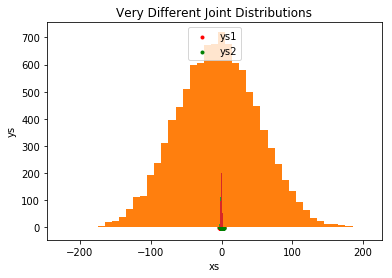

6.0
1
3
9
13
{1, 6}
99.0
81.54351395730716
9.03014473623248
6
22.425435139573064
0.24736957366478218
0.9058708933963228
-0.8966102350427149
[[1, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 0, 1, 0], [0, 0, 0, 0, 1]]
232.070007


168 primes: 100%|██████████| 997/997 [00:01<00:00, 532.56it/s]
dv: [1.5919452889207217, 0.11162039957636091, 36.4025547649421, 11.728489502502454, 6.3054693783325995, 409.1411976464874, 83.82938013669161, 0.5462659150557589, 4.768848492476459, 3.850536813148179, 263.53718173994434, 217.6040428594683, 50.931247036952826, 7.232500531801361, 27.233703089683054, 0.5477907044993009, 0.26388630980894356, 13.507324864098399, 67.78295966206943, 70.13649830855653, 36.833917659713805, 62.81150607293555, 99.42289309223996, 329.6646373521476, 159.02482358322735, 267.28038443536576, 25.2543636846306, 19.704656821177355, 51.08779881606417, 190.25852253860643, 64.99131775830777, 1143.1476522469352, 163.9832972890635, 6.726703383013999, 363.4921548740514, 122.20171442360089, 9.388707436498311, 57.899598294900905, 546.9038273357406, 13.902881092109721, 9.580837565714676, 63.552565331962946, 150.63412511151375, 0.824646397014724, 109.49196159980754, 71.29373158385135, 8.953570007916698, 59.3621140090828

dv: [3.7291722603393973, 3.0575116014958166, 3.816028366107473, 2.561289015349885, 3.790734490480504, 2.9095072331389007, 2.134143499631289, 2.989963873568396, 2.9534210145073554, 3.108992538981922, 3.625661159277623, 3.8068767913856894, 0.7094951205735852, 0.7227425131134853, 3.0937547286979385, 3.2583171146125656, 2.3804062450492673, 4.279953905362563, 2.2205597433828608, 3.0598630431134737, 1.5898501726201348, 1.3217861837980949, 3.4007102142337673, 3.4337960785936796, 1.802234275171412, 2.5596152066839197, 3.4415393060342336, 0.33059639087847015, 1.9343785184221132, 2.6964416369102606, 2.746614650151754, 0.3874720774382114, 1.4561434174522456, 3.1518395826799406, 2.7828921035134844, 2.490510832986491, 4.75940114702011, 4.076649102304663, 3.1191075220777797, 1.8718032079884868, 1.5123103609122968, 3.846379241822681, 0.9319736393661744, 4.882820730550545, 4.567581387616463, 0.17032474099229772, 2.01612621534163, 3.1186808132134356, 2.297621999111255, 2.5630108037337838, 1.30721360861

dv: [3.7407951855663097, 2.986545743698174, 3.8313911271974996, 2.615948081980928, 3.7485024716762587, 3.0490581505374266, 2.192764043401346, 3.2076355855985885, 2.9500773111661633, 3.0175556464463975, 3.5345058262668108, 3.77718784055064, 0.6999235598534654, 0.6167337150176492, 2.964087695946708, 3.289365427081917, 2.3068369608195667, 4.1562077354069125, 2.1626965602314177, 3.0176577734182706, 1.6423544050020706, 1.357223773081358, 3.3939980677731176, 3.2864750115641073, 1.853929958433204, 2.4057743673775493, 3.474989841474727, 0.28262514443841175, 1.9764255213255488, 2.738460460323173, 2.7246854399112337, 0.42120005015885587, 1.498797548347926, 3.1256945881855516, 2.8226277347058475, 2.4508914315178982, 4.716758754006521, 4.10473918529641, 3.1882635228848963, 1.9070100101266652, 1.528499192224503, 3.8314474220648367, 0.9125602588255741, 4.784293558253664, 4.600921680842811, 0.14478744709021862, 1.9613039925213749, 3.1470590422756275, 2.2773978912585195, 2.5650778764862947, 1.38335601

dv: [3.7440030903776944, 2.9569101400715656, 3.836077825176785, 2.637155887931524, 3.7300052121310063, 3.105163557556724, 2.2158034403935587, 3.2964905969127694, 2.947548113458768, 2.9797856241706793, 3.4965851388429914, 3.7637139292647666, 0.6957943084032241, 0.5760309915354009, 2.911289707132862, 3.30064057615822, 2.2765120042096454, 4.105053738004532, 2.138665476825162, 2.99947931335435, 1.6631585859234606, 1.3711358075848037, 3.3899316125403662, 3.2265426780549737, 1.8742882604077518, 2.3439953457352773, 3.4871657642743026, 0.2641923824591336, 1.9927564879292647, 2.7544395316236834, 2.71475983045836, 0.43506141568042805, 1.515611105564621, 3.1139110459402373, 2.8376382358490333, 2.4339913604044607, 4.697696186132866, 4.114478716286722, 3.215152679801066, 1.9205692147206308, 1.534455357461677, 3.8238908098499467, 0.9044082829254322, 4.742850124902122, 4.612591774218217, 0.13499759259732064, 1.9385799537554713, 3.157306687244892, 2.268340460282642, 2.564888798172026, 1.41418594144774

dv: [3.745409743542017, 2.9402690358698886, 3.8382949594914453, 2.6486765966258434, 3.7194120942552704, 3.13614737351108, 2.2283951374387048, 3.345894334232259, 2.945856261537647, 2.958676207595482, 3.4753267977525764, 3.7558900635168904, 0.6934439504453092, 0.5540307479872042, 2.8819664279517316, 3.3065664218915987, 2.2595792113336306, 4.076454914200397, 2.1252032883588936, 2.9891389752140487, 1.6745716429482973, 1.3787350963364686, 3.3873452410634775, 3.193270373416591, 1.8854249942682146, 2.3098961350706757, 3.4935728608598495, 0.25422565599896096, 2.0016322530800204, 2.7630361401461307, 2.70900223004117, 0.4427912984538585, 1.5248127811250838, 3.107086814707583, 2.84568734795129, 2.424416471600651, 4.686691172710066, 4.11947027863346, 3.2297742528674513, 1.9279088864404026, 1.5376070128142287, 3.8193308215427537, 0.8998199914439615, 4.719507153524348, 4.618604582204802, 0.12971007688341102, 1.9258606052878708, 3.162676554088635, 2.263107799225332, 2.564530296853304, 1.4312657114678

dv: [3.745409743542017, 2.9402690358698886, 3.8382949594914453, 2.6486765966258434, 3.7194120942552704, 3.13614737351108, 2.2283951374387048, 3.345894334232259, 2.945856261537647, 2.958676207595482, 3.4753267977525764, 3.7558900635168904, 0.6934439504453092, 0.5540307479872042, 2.8819664279517316, 3.3065664218915987, 2.2595792113336306, 4.076454914200397, 2.1252032883588936, 2.9891389752140487, 1.6745716429482973, 1.3787350963364686, 3.3873452410634775, 3.193270373416591, 1.8854249942682146, 2.3098961350706757, 3.4935728608598495, 0.25422565599896096, 2.0016322530800204, 2.7630361401461307, 2.70900223004117, 0.4427912984538585, 1.5248127811250838, 3.107086814707583, 2.84568734795129, 2.424416471600651, 4.686691172710066, 4.11947027863346, 3.2297742528674513, 1.9279088864404026, 1.5376070128142287, 3.8193308215427537, 0.8998199914439615, 4.719507153524348, 4.618604582204802, 0.12971007688341102, 1.9258606052878708, 3.162676554088635, 2.263107799225332, 2.564530296853304, 1.4312657114678

dv: [3.746175412848911, 2.92947483873081, 3.839578946279558, 2.6560051977619765, 3.7124641325259495, 3.1560512984226885, 2.2364342370585617, 3.3777575212238187, 2.9446578381265804, 2.9450206002804826, 3.4615506733511223, 3.750719226119581, 0.6919076171527004, 0.5400784036786301, 2.8630664792282228, 3.310259449818931, 2.248631284761489, 4.057951001754798, 2.116482924849891, 2.98238240748624, 1.6818746628134016, 1.383585276692399, 3.385554947247759, 3.1718301273272265, 1.8925391282355362, 2.2879976256762946, 3.497568919913699, 0.2479034519020831, 2.0072799945342594, 2.7684724806367655, 2.705199113820225, 0.4477853279247164, 1.530692346332759, 3.1025831469051486, 2.8507672102732724, 2.4181741108573473, 4.679440911729364, 4.122530515355807, 3.2390809951298007, 1.932567800888673, 1.5395796049596964, 3.816255212679934, 0.8968398100072784, 4.7043392307295555, 4.622303890628873, 0.1263583308932401, 1.9176253929814728, 3.1660167528563052, 2.2596591035102516, 2.5642039298475763, 1.44225818932014

dv: [3.746648387591153, 2.9218441724931448, 3.8404148885267593, 2.6611188155881846, 3.707516731327493, 3.170031732693934, 2.2420574780570526, 3.400197464251749, 2.943763637885297, 2.9353843310411314, 3.4518180771196967, 3.7470192068335746, 0.6908160650505294, 0.5303631787514229, 2.8497617480556654, 3.312799979889191, 2.24090845210603, 4.044891856169903, 2.110323809559817, 2.9775830719977354, 1.6869907879165742, 1.3869771821035726, 3.38423692172535, 3.1567394790602643, 1.897517234782806, 2.2726193693592918, 3.5003194204851362, 0.24350054009395833, 2.011221557021271, 2.772250485525864, 2.7024787403099024, 0.4513064457266607, 1.534807294734051, 3.099363495571919, 2.854292585951585, 2.4137465176231645, 4.674263462147556, 4.124611252042611, 3.2455775446744286, 1.9358138546865087, 1.5409406996604336, 3.8140261786755723, 0.8947311890697499, 4.6936043067698945, 4.624825532553172, 0.12402519614706746, 1.9118107828575617, 3.168311491991702, 2.2571957561776834, 2.5639295491025176, 1.4499888822605

dv: [3.7469659370509425, 2.916131662188105, 3.8410023229479977, 2.6649110863272556, 3.703793870427279, 3.180449640689465, 2.246235200136604, 3.416951173370196, 2.9430690722867103, 2.9281795725241015, 3.4445352518518515, 3.7442254026112027, 0.6899959686739441, 0.5231692860312964, 2.8398314851363606, 3.3146643578099204, 2.235135774224334, 4.035127053798448, 2.1057158871127495, 2.9739778849133427, 1.6907959501461007, 1.3894967645620524, 3.3832221713709245, 3.1454775169018627, 1.901216670661389, 2.2611615398763094, 3.502338714723337, 0.24023992650354709, 2.0141450538727694, 2.7750439896114063, 2.7004251557546906, 0.4539374817349206, 1.5378656766644865, 3.096933976975447, 2.856896630230225, 2.410424032548338, 4.670359637501327, 4.126124752673212, 3.2503968425322047, 1.9382185567635895, 1.541941796482638, 3.812328145981824, 0.8931516258750999, 4.685561253308386, 4.626663291956373, 0.12229796503679265, 1.9074615898110918, 3.169993807438686, 2.2553380531784697, 2.563700784180383, 1.45575480246

dv: [3.74719210546456, 2.911676249708416, 3.841437901342304, 2.667847690967521, 3.7008790162252194, 3.18854661027615, 2.2494747492010334, 3.429991331529942, 2.9425125540079358, 2.9225657097388855, 3.4388569974806757, 3.7420323518901037, 0.6893546169879421, 0.5176050818579754, 2.832104135406871, 3.316096372703825, 2.230638631982322, 4.027517929040497, 2.102123721120989, 2.9711588279012644, 1.6937490920563811, 1.3914503012586241, 3.3824142224675553, 3.1367146320401442, 1.9040859385976023, 2.2522573339414262, 3.5038902172194266, 0.23771774955918976, 2.0164091622901608, 2.777202268256666, 2.698813452636206, 0.45598661017306374, 1.5402379795169592, 3.0950277955787935, 2.8589069444180963, 2.407828059393414, 4.667298496333231, 4.127279182162178, 3.254129598423743, 1.9400791435291622, 1.5427120837602557, 3.8109865258408138, 0.8919190758838834, 4.6792842635910015, 4.628067201739922, 0.1209622548269937, 1.9040717021303215, 3.1712849681038766, 2.253881165327599, 2.5635086146450456, 1.460239233484

dv: [3.74736044536253, 2.908092690948986, 3.84177398882723, 2.670196307247455, 3.698527453435378, 3.1950412254882887, 2.2520684900914976, 3.440462871056784, 2.9420555966626902, 2.918053807655319, 3.4342910924237886, 3.7402595769048137, 0.688837678188083, 0.5131591153941064, 2.825900048974616, 3.3172342240423993, 2.2270247897424422, 4.0214021007943614, 2.0992355801251725, 2.9688868528434167, 1.6961151012555493, 1.393014249404989, 3.3817539587757617, 3.1296796111010967, 1.9063835942623724, 2.245115869173273, 3.5051233299657527, 0.235702317145565, 2.0182200949788682, 2.778925275884446, 2.6975108027194192, 0.4576329132493731, 1.5421378233342204, 3.093487488969703, 2.8605108173797014, 2.405737151103796, 4.664826024457955, 4.12819129146899, 3.257115499319595, 1.9415662160126523, 1.5433250057837213, 3.809896547063551, 0.8909273463942463, 4.6742331232772205, 4.629177812145613, 0.11989513354265628, 1.9013465629209114, 3.1723102499019316, 2.2527043230703514, 2.56334537300701, 1.4638381555243498,

dv: [3.74736044536253, 2.908092690948986, 3.84177398882723, 2.670196307247455, 3.698527453435378, 3.1950412254882887, 2.2520684900914976, 3.440462871056784, 2.9420555966626902, 2.918053807655319, 3.4342910924237886, 3.7402595769048137, 0.688837678188083, 0.5131591153941064, 2.825900048974616, 3.3172342240423993, 2.2270247897424422, 4.0214021007943614, 2.0992355801251725, 2.9688868528434167, 1.6961151012555493, 1.393014249404989, 3.3817539587757617, 3.1296796111010967, 1.9063835942623724, 2.245115869173273, 3.5051233299657527, 0.235702317145565, 2.0182200949788682, 2.778925275884446, 2.6975108027194192, 0.4576329132493731, 1.5421378233342204, 3.093487488969703, 2.8605108173797014, 2.405737151103796, 4.664826024457955, 4.12819129146899, 3.257115499319595, 1.9415662160126523, 1.5433250057837213, 3.809896547063551, 0.8909273463942463, 4.6742331232772205, 4.629177812145613, 0.11989513354265628, 1.9013465629209114, 3.1723102499019316, 2.2527043230703514, 2.56334537300701, 1.4638381555243498,

dv: [3.747490092777952, 2.9051404490618262, 3.8420413761292345, 2.6721222838468544, 3.696585439295033, 3.200379759824018, 2.254197380800924, 3.449078405629778, 2.9416729221885882, 2.9143390439086216, 3.430530366736366, 3.7387932066780345, 0.688411083269068, 0.5095159793087463, 2.8207963582785602, 3.318162337374502, 2.2240497836446464, 4.016366570814848, 2.0968569730533786, 2.967012094345033, 1.6980581310679146, 1.3942978074345613, 3.381203077595691, 3.1238926788260515, 1.908269718238264, 2.2392460545957005, 3.506129360264237, 0.23405072948499925, 2.0197052530657116, 2.780336131371135, 2.696433425333744, 0.45898795913887214, 1.5436974865574389, 3.092213788192896, 2.861823443294383, 2.40401265067114, 4.662782239094999, 4.128931783424463, 3.2595644441398557, 1.9427850336472576, 1.543825533153048, 3.808991337683155, 0.8901100838787438, 4.670070207497947, 4.630080397088121, 0.11902080911520965, 1.8991024453887377, 3.1731461056725996, 2.251731446882797, 2.5632051125133644, 1.4667977429216716

dv: [3.7475926951567025, 2.902661145139402, 3.8422593365835693, 2.6737335564773583, 3.694951245260861, 3.2048548005885293, 2.25597973740863, 3.456305964348014, 2.9413472309307296, 2.9112209512738936, 3.4273726522203165, 3.7375576415782477, 0.6880523233944256, 0.5064700612253704, 2.816515412791437, 3.3189353233615595, 2.2215528793177284, 4.012139707417039, 2.0948599161942307, 2.9654355548997557, 1.6996856173123878, 1.3953723626719596, 3.380735627770752, 3.1190388521818835, 1.9098490020605066, 2.2343259634019264, 3.506967390731676, 0.2326698217954433, 2.020947811799896, 2.7815149935315024, 2.6955257116151947, 0.46012507933492836, 1.5450034884039268, 3.0911408299205094, 2.86291975430634, 2.4025630555154005, 4.661061075057385, 4.129546059357788, 3.2616134865867017, 1.9438042417555643, 1.5442428107979609, 3.808226102087464, 0.8894235725987027, 4.666573038254864, 4.6308298004824575, 0.1182898832110112, 1.8972184749319776, 3.173841947187809, 2.250912088986215, 2.5630833086224816, 1.4692795266

dv: [3.7476757165480206, 2.9005459981882327, 3.842440544990097, 2.675103732903393, 3.6935547197445526, 3.208666601443935, 2.25749635504818, 3.4624663423910045, 2.941066271941811, 2.908561975724214, 3.4246791392131906, 3.736500606503658, 0.6877458955700152, 0.5038812996784341, 2.81286695100191, 3.319590140305426, 2.219423807477538, 4.008535113291466, 2.0931565484326375, 2.964089058866965, 1.701070985979823, 1.39628665805159, 3.3803333736378707, 3.114902305698933, 1.9111929515981405, 2.2301352860768486, 3.5076774178466033, 0.2314961257798139, 2.0220044994488564, 2.782516408081563, 2.694749217143205, 0.46109456806223276, 1.5461149284903386, 3.0902230948397773, 2.863850701327686, 2.4013254024493182, 4.659589273913472, 4.130064654472155, 3.2633561125065333, 1.9446706164557774, 1.5445965947356626, 3.8075696427333443, 0.8888377722178435, 4.6635887116581625, 4.6314629577915385, 0.11766871183895347, 1.895611685346201, 3.1744311904433373, 2.2502114006326948, 2.562976511077414, 1.4713941378113022

dv: [3.7477441443925814, 2.898717677862652, 3.8425936769506714, 2.6762848262698427, 3.6923458266358917, 3.211957098545662, 2.2588043905438613, 3.4677871909986413, 2.9408211169558633, 2.9062644129226416, 3.422351178843179, 3.7355847318406603, 0.6874807534328503, 0.5016508181218479, 2.809715981223336, 3.320152733865906, 2.217584256796737, 4.005420383340983, 2.091684436674489, 2.962924034351488, 1.7022662170589646, 1.3970751723267179, 3.379983107231602, 3.1113299208384335, 1.912352160911189, 2.226517886034878, 3.508287527227598, 0.23048483279976814, 2.022915405340887, 2.7833788469727843, 2.6940764638586967, 0.46193213525436605, 1.547073626232356, 3.089428056628945, 2.864652197908745, 2.400254863441958, 4.658314514698547, 4.130508890245337, 3.2648583938630247, 1.9454171886843734, 1.5449007734367883, 3.8069995261519987, 0.8883313189434033, 4.661008473520618, 4.632005689608756, 0.11713354743273907, 1.8942231304238482, 3.1749372798854525, 2.249604490080906, 2.5628820634509033, 1.4732200345054

dv: [3.747801428753151, 2.8971196174765126, 3.8427248704027273, 2.6773146890154402, 3.691287861123025, 3.2148298558112254, 2.2599454802539003, 3.472434789344521, 2.940605098564419, 2.904256842633541, 3.420316627646929, 3.7347825523887126, 0.6872488007210078, 0.49970671853654114, 2.806963920603594, 3.3206418795141377, 2.2159769909216385, 4.002698726998007, 2.09039792747735, 2.961904884655285, 1.7033091984998272, 1.3977630196938553, 3.379675014842084, 3.1082098837330907, 1.913363491116916, 2.223359847225555, 3.5088180473799215, 0.22960335832462395, 2.0237097066842633, 2.7841302633487515, 2.693487259244731, 0.462663875590105, 1.5479100519726623, 3.0887318182660195, 2.865350323919293, 2.3993186043184496, 4.657198373799896, 4.130894123426294, 3.266168422160219, 1.9460679826827243, 1.5451654093628617, 3.8064991832969657, 0.8878885798838135, 4.658752734899167, 4.632476612211993, 0.116667124123362, 1.8930097118307332, 3.175377171904497, 2.2490730754923636, 2.5627978958492066, 1.474814491964237

dv: [3.747801428753151, 2.8971196174765126, 3.8427248704027273, 2.6773146890154402, 3.691287861123025, 3.2148298558112254, 2.2599454802539003, 3.472434789344521, 2.940605098564419, 2.904256842633541, 3.420316627646929, 3.7347825523887126, 0.6872488007210078, 0.49970671853654114, 2.806963920603594, 3.3206418795141377, 2.2159769909216385, 4.002698726998007, 2.09039792747735, 2.961904884655285, 1.7033091984998272, 1.3977630196938553, 3.379675014842084, 3.1082098837330907, 1.913363491116916, 2.223359847225555, 3.5088180473799215, 0.22960335832462395, 2.0237097066842633, 2.7841302633487515, 2.693487259244731, 0.462663875590105, 1.5479100519726623, 3.0887318182660195, 2.865350323919293, 2.3993186043184496, 4.657198373799896, 4.130894123426294, 3.266168422160219, 1.9460679826827243, 1.5451654093628617, 3.8064991832969657, 0.8878885798838135, 4.658752734899167, 4.632476612211993, 0.116667124123362, 1.8930097118307332, 3.175377171904497, 2.2490730754923636, 2.5627978958492066, 1.474814491964237

dv: [3.7478500268863155, 2.8957094280295057, 3.842838590339754, 2.6782215604432813, 3.690353250955498, 3.2173623112350365, 2.2609507128078716, 3.4765335817481087, 2.940413132288892, 2.902485777399935, 3.418521435330284, 3.734073403015033, 0.6870439601091655, 0.49799540078933197, 2.804536999947547, 3.3210715153137182, 2.2145591499910853, 4.000297653653251, 2.089262820160662, 2.961004891849726, 1.7042282348375668, 1.3983689507909864, 3.379401644104884, 3.1054585288766052, 1.9142544688567305, 2.2205759970198593, 3.509284072184201, 0.22882740924195688, 2.0244091722355737, 2.784791482225616, 2.6929664120066383, 0.46330932606572656, 1.5486469613218574, 3.0881164048552456, 2.865964499437535, 2.398491992734089, 4.656211960301813, 4.1312317068458615, 3.267322080481071, 1.9466409123573765, 1.545397980353049, 3.8060560951201134, 0.887497836830753, 4.6567618315562305, 4.632889500617054, 0.11625657157063782, 1.89193914648033, 3.175763448224057, 2.2486034095152947, 2.5627223752724158, 1.476220354828

dv: [3.7478917331070893, 2.894454681831552, 3.8429381626903907, 2.6790269596443537, 3.689520858569481, 3.2196135922753717, 2.2618437962462576, 3.4801786621712623, 2.9402412696461298, 2.900910320708301, 3.416924260874274, 3.7334414189664926, 0.6868615755649967, 0.49647604592521455, 2.8023788558370883, 3.3214522160947677, 2.213297966770879, 3.9981617349704552, 2.0882529580170437, 2.960203587908617, 1.7050449208423946, 1.3989072638373061, 3.379157228315362, 3.103011934513248, 1.9150460881885703, 2.2181013062115977, 3.509697055354245, 0.22813848438106277, 2.0250303913599463, 2.7853783533373266, 2.6925022608794906, 0.46388342091920715, 1.5493017104885793, 3.087568020610386, 2.866509498632032, 2.3977561664514146, 4.655333107395942, 4.131530222028632, 3.2683467160717576, 1.9471496225048694, 1.5456041651920245, 3.805660615899753, 0.8871501229948203, 4.654990104716913, 4.633254775719697, 0.11589208936299107, 1.8909867465580164, 3.176105650617542, 2.2481849436141577, 2.562654197811632, 1.4774703

dv: [3.7479278861689043, 2.893330124055179, 3.8430261160778185, 2.679747588106969, 3.688774191246667, 3.2216296702509837, 2.2626431431394063, 3.483444017297567, 2.940086395159571, 2.8994986369441342, 3.4154929129200102, 3.7328742063605582, 0.6866980162402226, 0.4951169911061056, 2.800445640366664, 3.3217921573151057, 2.212167936176343, 3.996247821755141, 2.0873479748213657, 2.959485012517918, 1.7057760346304387, 1.3993890627376175, 3.3789372313034467, 3.1008203747560295, 1.9157546555335039, 2.215885217651196, 3.5100658531761884, 0.22752223198820853, 2.0255862401552434, 2.7859031646299135, 2.6920856966475397, 0.4643977830318962, 1.549887780956319, 3.087075890469097, 2.8669967712555033, 2.397096422827969, 4.654544506742053, 4.131796281334914, 3.2692635561313694, 1.9476046990003444, 1.5457883578712224, 3.8053051864174687, 0.8868384534014168, 4.653401984500194, 4.633580473053566, 0.11556607607237718, 1.8901332911422328, 3.1764111531137527, 2.247809440736673, 2.56259231046788, 1.47858992745

dv: [3.747959503881858, 2.8923157762415395, 3.8431044075088527, 2.6803966174123053, 3.6881001804361873, 3.2234468574983324, 2.263363283104523, 3.486388124873276, 2.939946015865731, 2.8982255521369886, 3.4142019293546197, 3.7323619337524825, 0.6865504065509657, 0.4938932780414993, 2.798702700426906, 3.3220977640053393, 2.2111488917461526, 3.9945217928671517, 2.0865317626928688, 2.9588365260072917, 1.706434820836587, 1.399823109288489, 3.3787380329584478, 3.0988445525374946, 1.9163930396682762, 2.2138877986318772, 3.510397426700654, 0.22696733885173734, 2.02608687380564, 2.786375597492136, 2.691709493996651, 0.4648616013706929, 1.5504158125544263, 3.0866314688669974, 2.867435335244654, 2.396501122080524, 4.653832434699631, 4.132035065744173, 3.270089343079473, 1.9480144874136665, 1.5459540142104542, 3.804983793661869, 0.8865573012882423, 4.651969324997084, 4.633872892870657, 0.115272540317285, 1.8893635793034753, 3.17668574894645, 2.2474703694275577, 2.5625358538705605, 1.479599200625241

dv: [3.747959503881858, 2.8923157762415395, 3.8431044075088527, 2.6803966174123053, 3.6881001804361873, 3.2234468574983324, 2.263363283104523, 3.486388124873276, 2.939946015865731, 2.8982255521369886, 3.4142019293546197, 3.7323619337524825, 0.6865504065509657, 0.4938932780414993, 2.798702700426906, 3.3220977640053393, 2.2111488917461526, 3.9945217928671517, 2.0865317626928688, 2.9588365260072917, 1.706434820836587, 1.399823109288489, 3.3787380329584478, 3.0988445525374946, 1.9163930396682762, 2.2138877986318772, 3.510397426700654, 0.22696733885173734, 2.02608687380564, 2.786375597492136, 2.691709493996651, 0.4648616013706929, 1.5504158125544263, 3.0866314688669974, 2.867435335244654, 2.396501122080524, 4.653832434699631, 4.132035065744173, 3.270089343079473, 1.9480144874136665, 1.5459540142104542, 3.804983793661869, 0.8865573012882423, 4.651969324997084, 4.633872892870657, 0.115272540317285, 1.8893635793034753, 3.17668574894645, 2.2474703694275577, 2.5625358538705605, 1.479599200625241

dv: [3.7479873729681317, 2.8913956145611617, 3.8431745755002447, 2.680984582780627, 3.6874883289429876, 3.2250942394426483, 2.2640158437718116, 3.489057850477472, 2.939818111883971, 2.897070882826123, 3.4130308907840528, 3.731896696422176, 0.6864164377420867, 0.49278495298929387, 2.7971222666261273, 3.3223741589702747, 2.2102246660218015, 3.9929562906730087, 2.085791404609554, 2.9582479807034567, 1.7070318822042048, 1.4002164149768217, 3.3785567070154205, 3.0970529780382807, 1.9169715399296776, 2.2120770652800537, 3.5106973268073944, 0.22646475994599297, 2.026540415232325, 2.786803388714377, 2.691367844006729, 0.465282241972492, 1.5508943210381798, 3.0862278862173995, 2.8678323949928664, 2.3959609220730225, 4.653185861566549, 4.132250694860292, 3.270837469440889, 1.9483856607799732, 1.5461038914939618, 3.804691591092875, 0.8863022330785516, 4.6506695462663625, 4.634137047779603, 0.11500669241708714, 1.8886654221129737, 3.176934055759577, 2.247162480089345, 2.562484119820608, 1.48051428

dv: [3.7480121105255506, 2.8905566286403492, 3.8432378464686017, 2.681520016863252, 3.6869301023462238, 3.2265954030829125, 2.2646102470971248, 3.49149121917137, 2.939701028276892, 2.8960182467268334, 3.411963219827896, 3.7314720620536534, 0.6862942335051062, 0.49177586169519805, 2.7956818097050578, 3.322625479351934, 2.2093821372503855, 3.9915291093253398, 2.085116414484829, 2.9577111300267895, 1.7075758127437195, 1.4005746610252516, 3.378390860888605, 3.095420104372966, 1.9174985025553637, 2.210427081103357, 3.5109700368607704, 0.22600717233234852, 2.0269534435822236, 2.7871927994500925, 2.691056020076899, 0.46566568266684805, 1.551330207527987, 3.085859553440127, 2.86819377918081, 2.395468232887106, 4.652595815371343, 4.132446487333557, 3.271518782917575, 1.9487236221427366, 1.546240217877027, 3.8044246262199066, 0.8860696483870962, 4.649484310845209, 4.634376978046899, 0.11476465495962608, 1.8880289251403943, 3.1771598016879157, 2.246881502312872, 2.5624365194469845, 1.481348238541

dv: [3.748034206991932, 2.889788138489151, 3.8432952102179194, 2.6820099081113677, 3.686418486451313, 3.2279696892990772, 2.2651542132832225, 3.4937194250249535, 2.9395933954348354, 2.8950541999660597, 3.4109853098340057, 3.7310827399301565, 0.6861822523162606, 0.49085277836292823, 2.7943628490278973, 3.3228551046916732, 2.2086105379109964, 3.990222025552684, 2.0844981857733993, 2.957219199080873, 1.7080736561373673, 1.400902502361198, 3.37823851816608, 3.0939249761213072, 1.9179807667747533, 2.2089165794433723, 3.511219219606655, 0.22558858041722085, 2.027331347530131, 2.787548954006022, 2.6907701346983717, 0.4660168283597364, 1.5517291272454554, 3.0855218740776613, 2.868524256957857, 2.395016820613404, 4.652054918881758, 4.1326251478776665, 3.2721421686944705, 1.949032795564081, 1.5463648145322195, 3.804179641567942, 0.885856591280391, 4.648398562907496, 4.634595978181799, 0.11454325361446313, 1.8874459678846045, 3.1773660313835688, 2.2466239245989565, 2.5623925590447536, 1.482111792

dv: [3.748054056764608, 2.8890812902459846, 3.8433474745129157, 2.6824600380727337, 3.685947660019401, 3.229233115878447, 2.2656541318222714, 3.495768313219606, 2.9394940695469347, 2.894167600451367, 3.4100858817782873, 3.7307243360110807, 0.686079215252686, 0.4900047650236997, 2.793150073891337, 3.3230658241620925, 2.2079009445224775, 3.9890199358773373, 2.083929584511342, 2.956766567285412, 1.708531243393338, 1.401203791420616, 3.378098031022831, 3.092550232710928, 1.9184239933007077, 2.2075279481908856, 3.511447898240189, 0.22520402561387332, 2.027678585273488, 2.7878760888972, 2.690506959387973, 0.4663397436322971, 1.5520957610544814, 3.0852110311974044, 2.8688277702968263, 2.3946015146268995, 4.651557046979765, 4.1327889040012025, 3.272714977980142, 1.9493168401911705, 1.5464791852834783, 3.803953926866395, 0.8856606109159156, 4.647399818755369, 4.634796762702804, 0.1143398632908698, 1.8869098195939298, 3.1775552570391477, 2.246386831337261, 2.5623518215366556, 1.4828138209070578,

dv: [3.748071980404309, 2.8884286781948436, 3.843395305200671, 2.682875233489187, 3.6855127490585704, 3.230399068416397, 2.26611533896929, 3.497659490081923, 2.9394020874641646, 2.8933491308495456, 3.409255502272153, 3.7303931688521357, 0.6859840518243822, 0.48922269294978354, 2.792030685484311, 3.323259961153284, 2.207245895391239, 3.9879102101235167, 2.0834046443249634, 2.9563485302307684, 1.7089534454367457, 1.4014817455050963, 3.377968013992561, 3.09128136208934, 1.9188329100032588, 2.206246469863194, 3.511658591316654, 0.22484936943628078, 2.0279988788626855, 2.7881777388223843, 2.690263789363831, 0.4666378269920062, 1.5524340185506231, 3.084923827263286, 2.8691076074442594, 2.3942179880033345, 4.651097069264253, 4.1329396075947304, 3.273243348330119, 1.949578810197748, 1.5465845834289746, 3.80374520765153, 0.8854796570588036, 4.646477634846108, 4.63498158936994, 0.11415229321753483, 1.8864148513676084, 3.1777295708639755, 2.24616778032986, 2.5623139520986693, 1.4834617464130468, 

dv: [3.748071980404309, 2.8884286781948436, 3.843395305200671, 2.682875233489187, 3.6855127490585704, 3.230399068416397, 2.26611533896929, 3.497659490081923, 2.9394020874641646, 2.8933491308495456, 3.409255502272153, 3.7303931688521357, 0.6859840518243822, 0.48922269294978354, 2.792030685484311, 3.323259961153284, 2.207245895391239, 3.9879102101235167, 2.0834046443249634, 2.9563485302307684, 1.7089534454367457, 1.4014817455050963, 3.377968013992561, 3.09128136208934, 1.9188329100032588, 2.206246469863194, 3.511658591316654, 0.22484936943628078, 2.0279988788626855, 2.7881777388223843, 2.690263789363831, 0.4666378269920062, 1.5524340185506231, 3.084923827263286, 2.8691076074442594, 2.3942179880033345, 4.651097069264253, 4.1329396075947304, 3.273243348330119, 1.949578810197748, 1.5465845834289746, 3.80374520765153, 0.8854796570588036, 4.646477634846108, 4.63498158936994, 0.11415229321753483, 1.8864148513676084, 3.1777295708639755, 2.24616778032986, 2.5623139520986693, 1.4834617464130468, 

dv: [3.7480882409907164, 2.8878240574950285, 3.8434392561576214, 2.6832595573821587, 3.6851096398111913, 3.2314788247214365, 2.26654232816957, 3.499411166073427, 2.939316632037214, 2.8925909361769455, 3.408486217290052, 3.730086129363439, 0.6858958587643115, 0.48849888005064207, 2.7909938971982453, 3.323439467425702, 2.20663910022183, 3.9868822002429223, 2.0829183346767683, 2.9559611185105994, 1.7093443647268547, 1.401739073694759, 3.3778472932348094, 3.090106134009878, 1.9192114982354995, 2.2050597448344873, 3.511853414718826, 0.22452112915372527, 2.028295361506128, 2.7884568775119503, 2.690038340455263, 0.46691394323452085, 1.5527471920954492, 3.0846575621636094, 2.869366534244325, 2.39386259052171, 4.650670654030614, 4.133078811509306, 3.2737324464669997, 1.9498212759801796, 1.5466820622731507, 3.803551560186265, 0.8853120006594352, 4.645623203393731, 4.635152352131109, 0.11397869987823554, 1.8859563174039966, 3.1778907300608537, 2.24596470951494, 2.562278646903104, 1.48406182241988

dv: [3.74810305634264, 2.887262123098407, 3.8434797919511827, 2.683616455750954, 3.6847348346372515, 3.2324819579122788, 2.266938911681987, 3.5010388040979747, 2.9392370051879273, 2.8918863449819647, 3.4077712703193463, 3.729800572639694, 0.6858138682838578, 0.48782681260901484, 2.7900305503679736, 3.3236059951930375, 2.2060752167224162, 3.9859268624242663, 2.082466382537531, 2.9556009581723353, 1.709707482475238, 1.4019780743224564, 3.377734867209265, 3.0890141642439093, 1.9195631359554044, 2.203957248004676, 3.512034159731015, 0.2242163516676887, 2.0285706906621286, 2.788716025774513, 2.689828669593556, 0.467170525259298, 1.5530380751383535, 3.0844099391484905, 2.869606894852427, 2.3935322200641362, 4.650274117133899, 4.133207828047202, 3.2741866547105083, 1.9500464171747969, 1.5467725138367219, 3.8033713456879963, 0.8851561727200729, 4.644829041078131, 4.63531065215105, 0.11381752020231244, 1.885530186687429, 3.1780402218665387, 2.2457758650450717, 2.5622456442206394, 1.484619358269

dv: [3.748116608267489, 2.8867383376472984, 3.843517305204119, 2.683948871511346, 3.6843853396888293, 3.233416649861762, 2.267308346164357, 3.502555623850154, 2.93916260676551, 2.8912296523655505, 3.4071048829771393, 3.7295342335831516, 0.6857374233401138, 0.4872009292367439, 2.7891328153610577, 3.323760952964702, 2.2055496767667044, 3.9850364630076562, 2.0820451335879664, 2.95526516199616, 1.7100457730684384, 1.4022007107107866, 3.3776298758604915, 3.087996575595643, 1.9198907089423785, 2.2029299840821905, 3.5122023535290006, 0.22393251558719682, 2.0288271358789483, 2.788957335355062, 2.689633112795073, 0.46740965329230877, 1.5533090541644858, 3.0841789914683386, 2.869830689882519, 2.3932242224501263, 4.649904304135366, 4.133327774175521, 3.2746097157857013, 1.9502560948844192, 1.5468566988618335, 3.803203158916816, 0.8850109166983424, 4.644088746672675, 4.635457852743476, 0.11366741969664912, 1.8851330119918472, 3.178179313926066, 2.2455997452017935, 2.562214717325339, 1.485138892351

dv: [3.7481290496457653, 2.886248796090574, 3.8435521300529225, 2.6842593339368284, 3.684058576449118, 3.234289937514282, 2.267653431297241, 3.5039729983221193, 2.9390929177818794, 2.8906159493427825, 3.406482082449787, 3.7292851604033035, 0.6856659581645396, 0.4866164513391484, 2.7882939565974034, 3.323905549277406, 2.2050585496907713, 3.984204347203402, 2.0816514430486643, 2.9549512439053363, 1.7103617939478069, 1.4024086706472763, 3.3775315762300453, 3.087045731424911, 1.9201966981424157, 2.2019702166996726, 3.512359306555605, 0.22366745438280478, 2.0290666477510833, 2.7891826547192706, 2.689450236286325, 0.46763311718045236, 1.5535621809091622, 3.0839630245633396, 2.870039637697263, 2.392936312600057, 4.64955849744713, 4.1334396068616535, 3.2750048465043906, 1.9504519083621628, 1.5469352703219323, 3.8030457875787054, 0.8848751510602688, 4.64339681034754, 4.635595122321053, 0.11352725174558073, 1.884761826852457, 3.178309093733003, 2.245435056204854, 2.5621856687908773, 1.4856243284

dv: [3.7481405099167677, 2.885790118153503, 3.843584552688957, 2.6845500295595115, 3.6837523113974537, 3.2351079083398364, 2.2679765879933944, 3.505300768558047, 2.939027486998988, 2.890040987346996, 3.4058985644473916, 3.7290516617059843, 0.6855989827863007, 0.4860692487655518, 2.7875081460294777, 3.324040827284394, 2.204598433749197, 3.9834247554392404, 2.081282588981955, 2.95465705093819, 1.7106577569013197, 1.4026034135471066, 3.377439322977741, 3.0861550241310884, 1.9204832489374226, 2.2010712534726715, 3.512506149995416, 0.22341929548811046, 2.0292909125832015, 2.789393581168888, 2.6892787976186683, 0.46784246585040745, 1.5537992296292604, 3.0837605700726174, 2.870235222952581, 2.392666511887941, 4.649234342473115, 4.133544150968007, 3.2753748278870947, 1.950635239935088, 1.547008792025741, 3.8028981799677433, 0.8847479395337644, 4.642748462181232, 4.635723468315631, 0.11339602535944386, 1.8844140637489175, 3.178430499817759, 2.245280677060742, 2.5621583258699747, 1.4860790442143

dv: [3.7481405099167677, 2.885790118153503, 3.843584552688957, 2.6845500295595115, 3.6837523113974537, 3.2351079083398364, 2.2679765879933944, 3.505300768558047, 2.939027486998988, 2.890040987346996, 3.4058985644473916, 3.7290516617059843, 0.6855989827863007, 0.4860692487655518, 2.7875081460294777, 3.324040827284394, 2.204598433749197, 3.9834247554392404, 2.081282588981955, 2.95465705093819, 1.7106577569013197, 1.4026034135471066, 3.377439322977741, 3.0861550241310884, 1.9204832489374226, 2.2010712534726715, 3.512506149995416, 0.22341929548811046, 2.0292909125832015, 2.789393581168888, 2.6892787976186683, 0.46784246585040745, 1.5537992296292604, 3.0837605700726174, 2.870235222952581, 2.392666511887941, 4.649234342473115, 4.133544150968007, 3.2753748278870947, 1.950635239935088, 1.547008792025741, 3.8028981799677433, 0.8847479395337644, 4.642748462181232, 4.635723468315631, 0.11339602535944386, 1.8844140637489175, 3.178430499817759, 2.245280677060742, 2.5621583258699747, 1.4860790442143

dv: [3.748151099369195, 2.885359362168553, 3.8436148196948983, 2.6848228588828884, 3.683464599591324, 3.2358758568218864, 2.26827992097858, 3.5065474957513474, 2.938965920108031, 2.8895010696768035, 3.405350583391834, 3.7288322640244043, 0.6855360706215997, 0.4855557323767872, 2.7867703137613478, 3.324167692365244, 2.2041663691590014, 3.9826926762238184, 2.080936202824941, 2.9543807086984835, 1.7109355851213777, 1.4027862081901459, 3.3773525526914754, 3.0853187057566207, 1.920752226575372, 2.2002272739144564, 3.512643865690319, 0.22318641160124206, 2.029501396116404, 2.7895915025039426, 2.6891177144584106, 0.46803904692811654, 1.554021742933635, 3.0835703489240784, 2.8704187353974175, 2.3924130979163998, 4.648929788341801, 4.133642121477978, 3.2757220772547138, 1.9508072909305236, 1.5470777534740203, 3.8027594189516245, 0.8846284672684114, 4.642139550746318, 4.63584376421592, 0.11327287938589445, 1.8840874885523826, 3.178544346637658, 2.2451356313549113, 2.562132536724339, 1.4865059773

dv: [3.74816091252836, 2.8849539554537396, 3.8436431446968444, 2.685079482125656, 3.6831937390410627, 3.236598410789218, 2.268565269285121, 3.5077206648315937, 2.938907870931972, 2.8889929638091325, 3.4048348636996644, 3.7286256774537927, 0.6854768484399143, 0.48507276741573857, 2.7860760274193974, 3.3242869343520023, 2.2037597678614356, 3.98200372729084, 2.080610213269055, 2.9541205772545434, 1.711196959251355, 1.4029581631683323, 3.3772707711491625, 3.084531751197403, 1.9210052608965507, 2.199433190516291, 3.512773310223639, 0.2229673814154355, 2.0296993787982385, 2.7897776306086586, 2.68896603933328, 0.4682240387391449, 1.5542310687642549, 3.083391241470574, 2.8705913011461623, 2.3921745639194927, 4.648643039959832, 4.133734141357637, 3.276048706379987, 1.950969110648085, 1.547142581824504, 3.802628700889139, 0.8845160215712486, 4.641566444996623, 4.635956771304258, 0.11315706171578696, 1.8837801475692406, 3.178651344609862, 2.2449990644313758, 2.5621081673277994, 1.4869076962603347

dv: [3.7481700308533243, 2.8845716376298554, 3.843669713716534, 2.685321356404686, 3.6829382335321372, 3.237279634189626, 2.2688342473084098, 3.508826850140365, 2.938853034221338, 2.8885138300237654, 3.4043485275580654, 3.7284307676331414, 0.6854209881901107, 0.4846176031088424, 2.785421393991218, 3.3243992455624674, 2.203376356351882, 3.9813540588513177, 2.0803028005742474, 2.9538752152139827, 1.7114433548333, 1.403120251641901, 3.377193542901471, 3.083789746893427, 1.9212437827023434, 2.198684535736076, 3.5128952344623583, 0.2227609577065447, 2.029885984452726, 2.7899530287378447, 2.6888229390438836, 0.46839847635367243, 1.554428390467791, 3.0832222631442767, 2.870753908080949, 2.3919495856973048, 4.648372518930065, 4.133820756024629, 3.2763565687584757, 1.951121619905291, 1.5472036516035834, 3.8025053184171123, 0.884409976221076, 4.6410259543773, 4.636063156270762, 0.1130479123857337, 1.8834903244328025, 3.178752116362255, 2.244870224790857, 2.562085098906255, 1.4872864563605892, 1.

dv: [3.7481785249018844, 2.88421041414307, 3.8436946895110222, 2.6855497661776733, 3.682696762116685, 3.237923111298438, 2.2690882784307025, 3.5098718512203724, 2.9388011397150455, 2.888061162890294, 3.4038890357084144, 3.7282465327409873, 0.6853682002944699, 0.4841878150433143, 2.7848029793760043, 3.324505235538861, 2.203014128814117, 3.98074027427941, 2.080012359112377, 2.953643350250888, 1.7116760729816887, 1.4032733316133215, 3.377120482694385, 3.0830887996049166, 1.9214690535412622, 2.1979773694037146, 3.513010299530152, 0.22256604121146922, 2.0300622037537996, 2.7901186338461943, 2.688687677760283, 0.46856327293593336, 1.5546147514247486, 3.083062544469853, 2.870907426635659, 2.3917369944937064, 4.648116831470577, 4.133902445155707, 3.2766472983124055, 1.9512656303116012, 1.5472612926467244, 3.802388646299092, 0.8843097786055991, 4.640515263310135, 4.636163505592452, 0.11294484974768723, 1.88321650476117, 3.1788472100131124, 2.2447484488207823, 2.5620632258087803, 1.4876442471964

dv: [3.7481864560814016, 2.883868517902115, 3.8437182151167, 2.6857658483351967, 3.6824681539126587, 3.2385320161771998, 2.2693286227428255, 3.5108608048519754, 2.9387519472132624, 2.887632742980078, 3.4034541385717767, 3.7280720844839412, 0.6853182281106225, 0.48378125768319835, 2.7842177420104925, 3.3246054431761087, 2.202671308445699, 3.980159364657365, 2.0797374664531327, 2.9534238547665526, 1.7118962656771444, 1.4034181626420934, 3.3770512483615662, 3.0824254611503443, 1.9216821902675534, 2.1973082023469055, 3.5131190899522755, 0.22238165910234775, 2.0302289135734903, 2.7902752749846136, 2.6885596030528984, 0.4687192373613043, 1.554791075356605, 3.0829113145481597, 2.871052626916414, 2.391535754601639, 4.647874741907173, 4.1339796323890505, 3.276922341293392, 1.951401860152238, 1.5473157966348687, 3.8022781297157118, 0.8842149391033385, 4.64003187711064, 4.636258337352367, 0.11284735907241382, 1.882957346989288, 3.178937110097015, 2.244633148177845, 2.5620424537272903, 1.487982830

dv: [3.7481864560814016, 2.883868517902115, 3.8437182151167, 2.6857658483351967, 3.6824681539126587, 3.2385320161771998, 2.2693286227428255, 3.5108608048519754, 2.9387519472132624, 2.887632742980078, 3.4034541385717767, 3.7280720844839412, 0.6853182281106225, 0.48378125768319835, 2.7842177420104925, 3.3246054431761087, 2.202671308445699, 3.980159364657365, 2.0797374664531327, 2.9534238547665526, 1.7118962656771444, 1.4034181626420934, 3.3770512483615662, 3.0824254611503443, 1.9216821902675534, 2.1973082023469055, 3.5131190899522755, 0.22238165910234775, 2.0302289135734903, 2.7902752749846136, 2.6885596030528984, 0.4687192373613043, 1.554791075356605, 3.0829113145481597, 2.871052626916414, 2.391535754601639, 4.647874741907173, 4.1339796323890505, 3.276922341293392, 1.951401860152238, 1.5473157966348687, 3.8022781297157118, 0.8842149391033385, 4.64003187711064, 4.636258337352367, 0.11284735907241382, 1.882957346989288, 3.178937110097015, 2.244633148177845, 2.5620424537272903, 1.487982830

dv: [3.748193878074639, 2.883544377416459, 3.843740416763033, 2.685970613012838, 3.6822513671587425, 3.2391091703244843, 2.26955640004335, 3.5117982780686834, 2.9387052424657636, 2.887226596768273, 3.4030418356592325, 3.7279066322884193, 0.6852708433296973, 0.4833960249934108, 2.7836629777659496, 3.3247003467657814, 2.2023463153440326, 3.9796086544215474, 2.079476857690968, 2.9532157256652694, 1.7121049567545714, 1.4035554197117845, 3.376985534899459, 3.0817966659257383, 1.921884185416931, 2.196673933001787, 3.51322212454207, 0.22220694713604472, 2.0303868930302444, 2.790423688552133, 2.688438134277436, 0.46886708884413636, 1.5549581831745058, 3.082767887323951, 2.871190192893595, 2.3913449447573374, 4.647645150636322, 4.1340526933481625, 3.2771829827446846, 1.9515309475606826, 1.5473674225093537, 3.802173274516666, 0.8841250222641223, 4.639573577064958, 4.6363481110171225, 0.1127549830992685, 1.8827116581467491, 3.1790222466117046, 2.2445237992982325, 2.562022698199825, 1.488303773372

dv: [3.7482008380085743, 2.8832365901797017, 3.843761406283187, 2.686164960955208, 3.6820454717056457, 3.239657090806595, 2.2697726090320485, 3.5126883458324105, 2.9386608337217974, 2.8868409631425465, 3.402650341666196, 3.727749470080203, 0.6852258421302532, 0.48303041759434223, 2.783136273934729, 3.324790372363653, 2.20203773968453, 3.979085755963467, 2.079229404000236, 2.9530180674519872, 1.7123030594209452, 1.4036857048022113, 3.376923069500646, 3.081199678731326, 1.9220759242113143, 2.1960717944923585, 3.5133198654709985, 0.2220411347639412, 2.030536836878653, 2.7905645310157463, 2.6883227528615117, 0.46900746915447455, 1.5551168070407266, 3.08263165010249, 2.8713207342360714, 2.3911637425926866, 4.647427075698898, 4.134121962317888, 3.277430368580107, 1.9516534615071535, 1.5474164009845, 3.802073639059548, 0.8840396394408637, 4.639138382898146, 4.636433235574263, 0.11266731415355456, 1.8824783736254471, 3.179103002553864, 2.2444199346264075, 2.5620038833459535, 1.4886084725981608

dv: [3.7482073774184115, 2.882943900313052, 3.8437812831202027, 2.686349698083364, 3.6818496343004674, 3.240178030661369, 2.269978143415835, 3.513534656254473, 2.938618548819967, 2.8864742652766555, 3.4022780579950513, 3.727599965168409, 0.6851830419463651, 0.4826829152119104, 2.7826354705960177, 3.3248759007997872, 2.201744319196009, 3.978588531502749, 2.0789940946240795, 2.952830078029315, 1.7124913909572275, 1.403809556599891, 3.3768636073685374, 3.080632050965851, 1.9222581988286471, 2.1954993102066163, 3.513412725867673, 0.22188353264219765, 2.0306793667428935, 2.7906983895774893, 2.6882129941376793, 0.4691409528770338, 1.5552676021687928, 3.082502053894835, 2.8714447962342526, 2.3909914115722235, 4.6472196372896, 4.134187737830442, 3.2776655241077597, 1.9517699110160367, 1.5474629383292822, 3.8019788273406774, 0.8839584426001749, 4.638724521246323, 4.636514076342974, 0.1125839875349506, 1.8822565401873215, 3.179179720231519, 2.244321135241181, 2.561985940793266, 1.488898179412847

dv: [3.748213533047273, 2.8826651796904277, 3.843800136005864, 2.6865255477796794, 3.681663106155321, 3.240674012991123, 2.2701738054941005, 3.5143404856419735, 2.9385782327215377, 2.886125086887788, 3.4019235487138695, 3.7274575488512953, 0.6851422787378837, 0.48235215344873744, 2.7821586280097916, 3.32495727358237, 2.2014649201473, 3.9781150609021823, 2.078770021669371, 2.952651036701591, 1.71267068512107, 1.403927458688637, 3.3768069281729485, 3.0800915836565115, 1.9224317204398502, 2.1949542563121263, 3.5135010762180174, 0.2217335221008466, 2.0308150405901757, 2.790825791166818, 2.688108440441695, 0.4692680560706034, 1.55541115677733, 3.082378605259184, 2.8715628681641756, 2.3908272899613956, 4.647022044667925, 4.1342502873643765, 3.277889369651825, 1.951880752938014, 1.5475072195531423, 3.8018884831842965, 0.8838811190964722, 4.638330399036148, 4.636590960704726, 0.11250467594310234, 1.8820453016198018, 3.1792527065795717, 2.2442270246248626, 2.561968808761959, 1.4891740172271966,

dv: [3.7482193375132367, 2.8823994119256775, 3.843818044372984, 2.6866931612986633, 3.681485212395057, 3.241146859870806, 2.2703603176740095, 3.5151087851829836, 2.9385397454099427, 2.885792152097011, 3.401585520161679, 3.7273217084391246, 0.6851034046737069, 0.48203690410240196, 2.781703998964428, 3.325034797894577, 2.201198521219743, 3.9776636143668025, 2.0785563672082126, 2.952480293994153, 1.712841602661027, 1.4040398464920032, 3.376752833034393, 3.0795762961059263, 1.9225971294120148, 2.1944346299726964, 3.5135852497825124, 0.22159054622085486, 2.030944360759162, 2.7909472100585386, 2.688008715252008, 0.46938924361281703, 1.5555480005276274, 3.0822608593733927, 2.8716753903723053, 2.3906707814651855, 4.6468335850452345, 4.134309851317211, 3.278102733791747, 1.9519863985357273, 1.5475494111031418, 3.8018022853037374, 0.8838073872382096, 4.637954580898873, 4.636664182949329, 0.11242908475456398, 1.8818438865675904, 3.1793222376582033, 2.244137263372996, 2.5619524312809525, 1.4894369

dv: [3.7482193375132367, 2.8823994119256775, 3.843818044372984, 2.6866931612986633, 3.681485212395057, 3.241146859870806, 2.2703603176740095, 3.5151087851829836, 2.9385397454099427, 2.885792152097011, 3.401585520161679, 3.7273217084391246, 0.6851034046737069, 0.48203690410240196, 2.781703998964428, 3.325034797894577, 2.201198521219743, 3.9776636143668025, 2.0785563672082126, 2.952480293994153, 1.712841602661027, 1.4040398464920032, 3.376752833034393, 3.0795762961059263, 1.9225971294120148, 2.1944346299726964, 3.5135852497825124, 0.22159054622085486, 2.030944360759162, 2.7909472100585386, 2.688008715252008, 0.46938924361281703, 1.5555480005276274, 3.0822608593733927, 2.8716753903723053, 2.3906707814651855, 4.6468335850452345, 4.134309851317211, 3.278102733791747, 1.9519863985357273, 1.5475494111031418, 3.8018022853037374, 0.8838073872382096, 4.637954580898873, 4.636664182949329, 0.11242908475456398, 1.8818438865675904, 3.1793222376582033, 2.244137263372996, 2.5619524312809525, 1.4894369

dv: [3.748224819868563, 2.8821456787257187, 3.8438350795493355, 2.6868531266304774, 3.6813153430592522, 3.241598216972738, 2.270538332276325, 3.515842220722416, 2.938502960094271, 2.8854743082677103, 3.4012628035679056, 3.7271919804496134, 0.6850662861566097, 0.48173605841172984, 2.781270005217569, 3.325108750843657, 2.200944199764782, 3.977232629179675, 2.078352392285957, 2.9523172629737138, 1.7130047402709903, 1.4041471131849967, 3.3767011419468482, 3.079084399180502, 1.9227550039971366, 2.1939386222749353, 3.513665547202951, 0.22145410223854803, 2.0310677807952757, 2.791063074356365, 2.687913478190845, 0.4695049354584703, 1.5556786117089292, 3.082148414126171, 2.871782760304665, 2.3905213472478875, 4.646653614106708, 4.134366646379908, 3.278306364634117, 1.9520872190899816, 1.5475896631580892, 3.801719943084891, 0.8837369925089552, 4.637595769919827, 4.636734008392303, 0.11235694800249021, 1.881651598163266, 3.1793885624776133, 2.2440515446823026, 2.5619367575139034, 1.4896880353616

dv: [3.7482300060708167, 2.8819031482096307, 3.8438513057716395, 2.687005976080161, 3.681152945396504, 3.242029574633954, 2.270708439921981, 3.516543206798428, 2.938467761666372, 2.88517051131821, 3.4009543401763196, 3.7270679447787187, 0.685030802132011, 0.4814486127329507, 2.7808552173371095, 3.32517938309014, 2.200701120043104, 3.9768206897914973, 2.078157427513334, 2.9521614118165815, 1.7131606382494977, 1.404249614750086, 3.376651691566005, 3.0786142724541317, 1.9229058677635353, 2.1934645950662923, 3.5137422404373377, 0.22132373505157885, 2.0311857112956893, 2.7911737715352745, 2.6878224207419192, 0.46961551199523677, 1.5558034233840332, 3.082040905055531, 2.8718853376601463, 2.3903784991008936, 4.646481547892961, 4.134420868416113, 3.2785009394516167, 1.9521835506930794, 1.5476281115884876, 3.801641192971055, 0.8836697043326511, 4.6372527911597565, 4.6368006768888135, 0.11228802493949663, 1.8814678051524825, 3.179451906264432, 2.2439695904858277, 2.5619217411775037, 1.4899279573

dv: [3.748234919381631, 2.8816710648695087, 3.8438667810505938, 2.6871521927755517, 3.680997517238554, 3.242442285954432, 2.2708711767345653, 3.51721393588737, 2.9384340453705775, 2.8848798131002518, 3.4006591684603618, 3.726949219686689, 0.6849968426339486, 0.48117365624242664, 2.7804583373805842, 3.3252469219606478, 2.2004685231182584, 3.976426510710573, 2.0779708649813573, 2.952012257419355, 1.7133097870783462, 1.4043476743192727, 3.3766043333036704, 3.0781644445702963, 1.9230501959781745, 2.1930110610577342, 3.5138155761350323, 0.22119903164362245, 2.031298524928214, 2.7912796531990316, 2.687735262567135, 0.4697213186458097, 1.555922828667394, 3.0819380009954074, 2.8719834488136082, 2.390241793569422, 4.646316855818003, 4.13447269492926, 3.278687072959765, 1.952275698364183, 1.5476648796380073, 3.8015657953509554, 0.8836053132933517, 4.636924577491123, 4.636864405845271, 0.11222209708688513, 1.8812919342671566, 3.1795124732630478, 2.2438911481290025, 2.5619073400375942, 1.490157515

dv: [3.74823958070565, 2.8814487409087173, 3.8438815579118555, 2.687292216277282, 3.6808486012808292, 3.2428375824054387, 2.2710270305501057, 3.517856403629872, 2.9384017156524376, 2.8846013505104833, 3.4003764130930265, 3.7268354574687343, 0.684964307530144, 0.48091036033763224, 2.7800781839551947, 3.325311574128375, 2.200245718138143, 3.9760489217419535, 2.0777921512859394, 2.9518693598845367, 1.7134526330951052, 1.4044415859176667, 3.376558931679692, 3.077733576303491, 1.9231884211095027, 2.1925766666640354, 3.513885778543261, 0.22107961627896972, 2.0314065607577696, 2.79138103918009, 2.6876517483262874, 0.4698226698379131, 1.5560371852759591, 3.081839400316896, 2.8720773906272137, 2.3901108268839777, 4.646159054641278, 4.134522287185033, 3.2788653244519037, 1.9523639395964845, 1.5477000793717648, 3.801493531869644, 0.8835436287362811, 4.636610157376814, 4.636925392810768, 0.11215896569142943, 1.8811234636456047, 3.179570449147602, 2.2438159874998735, 2.5618935154711573, 1.490377393

dv: [3.7482440088798765, 2.8812355487409866, 3.8438956840333236, 2.687426447432826, 3.680705780127318, 3.2432165873405596, 2.271176446290995, 3.518472430670983, 2.938370685158867, 2.884334336062256, 3.40010527539535, 3.726726340703156, 0.6849331054349151, 0.4806579694676905, 2.7797136792835, 3.3253735279300423, 2.2000320747859385, 3.9756868552061513, 2.07762078148768, 2.951732317743771, 1.7135895834025754, 1.4045316177031042, 3.3765153628915674, 3.0773204458947636, 1.9233209375896867, 2.1921601771500656, 3.5139530520195428, 0.22096514634521044, 2.031510127989917, 2.7914782210860665, 2.6875716449210256, 0.46991985244169676, 1.5561468194675676, 3.0817448276710424, 2.8721674337469394, 2.389985230570191, 4.646007703244375, 4.134569792044306, 3.2790362039728995, 1.9524485274260974, 1.5477338129284575, 3.801424203096442, 0.8834844766902825, 4.636308644285932, 4.63698381771548, 0.11209844952522652, 1.8809619171349405, 3.1796260031066823, 2.243743898542377, 2.5618802320843423, 1.49058821611272

dv: [3.7482440088798765, 2.8812355487409866, 3.8438956840333236, 2.687426447432826, 3.680705780127318, 3.2432165873405596, 2.271176446290995, 3.518472430670983, 2.938370685158867, 2.884334336062256, 3.40010527539535, 3.726726340703156, 0.6849331054349151, 0.4806579694676905, 2.7797136792835, 3.3253735279300423, 2.2000320747859385, 3.9756868552061513, 2.07762078148768, 2.951732317743771, 1.7135895834025754, 1.4045316177031042, 3.3765153628915674, 3.0773204458947636, 1.9233209375896867, 2.1921601771500656, 3.5139530520195428, 0.22096514634521044, 2.031510127989917, 2.7914782210860665, 2.6875716449210256, 0.46991985244169676, 1.5561468194675676, 3.0817448276710424, 2.8721674337469394, 2.389985230570191, 4.646007703244375, 4.134569792044306, 3.2790362039728995, 1.9524485274260974, 1.5477338129284575, 3.801424203096442, 0.8834844766902825, 4.636308644285932, 4.63698381771548, 0.11209844952522652, 1.8809619171349405, 3.1796260031066823, 2.243743898542377, 2.5618802320843423, 1.49058821611272

dv: [3.7482482209215986, 2.8810309144718977, 3.843909202795265, 2.687555252591345, 3.6805686719825714, 3.2435803277325386, 2.271319830632991, 3.519063681635517, 2.93834087386682, 2.8840780496931253, 3.399845025036183, 3.7266215789885764, 0.6849031527641835, 0.4804157931724234, 2.779363837966002, 3.3254329553757804, 2.199827016720597, 3.975339334832918, 2.0774562938630217, 2.951600763805515, 1.7137210101328406, 1.4046180147795704, 3.3764735135686714, 3.076923936311248, 1.923448105950504, 2.1917604637277157, 3.514017583211231, 0.22085530874380696, 2.031609509221459, 2.7915714653783605, 2.687494739098132, 0.47001312875645046, 1.556252029461401, 3.0816540311563654, 2.8722538254639733, 2.389864667632881, 4.645862398089148, 4.13461534355177, 3.279200177680024, 1.952529693096558, 1.5477661736067923, 3.8013576264954807, 0.8834276980622681, 4.636019227495209, 4.637039844811104, 0.11204038297556261, 1.8808068593400455, 3.179679289651533, 2.243674689093994, 2.561867457378264, 1.490790553182743, 1

dv: [3.7482522322416783, 2.8808343122151725, 3.843922153756953, 2.6876789672759167, 3.6804369268939054, 3.2439297444032125, 2.2714575560720127, 3.519631681669715, 2.93831220832157, 2.8838318316222566, 3.3995949927951963, 3.7265209060971154, 0.6848743729112692, 0.48018319914723645, 2.77902775718525, 3.3254900138986514, 2.1996300158580873, 3.975005466078299, 2.0772982653278493, 2.9514743615335104, 1.7138472541632825, 1.4047010016487664, 3.376433279683823, 3.076543024140137, 1.9235702564274022, 2.1913764923096366, 3.514079542952781, 0.22074981674574107, 2.031704963272615, 2.7916610160537707, 2.6874208353583966, 0.47010273911443323, 1.5563530884186376, 3.0815667798476247, 2.8723367922068705, 2.3897488292281817, 4.645722769255292, 4.134659064317625, 3.2793576725137883, 1.9526076483800936, 1.5477972468113612, 3.801293634653835, 0.8833731470628193, 4.6357411640678965, 4.637093624358819, 0.11198461438095002, 1.880657891306905, 3.1797304501898997, 2.243608182999249, 2.56185516145575, 1.49098492

dv: [3.7482560568286525, 2.880645259121022, 3.8439345730709986, 2.6877978993932805, 3.6803102234630996, 3.2442657009685765, 2.271589964479286, 3.520177830907479, 2.9382846209687115, 2.883595076103292, 3.3993545642327585, 3.726424077482619, 0.6848466955257476, 0.47995960718214864, 2.7787046081391966, 3.325544847882454, 2.1994405873696814, 3.9746844276555366, 2.077146307434606, 2.9513528018781314, 1.7139686283653586, 1.4047807843532092, 3.376394565599305, 3.07617676987639, 1.9236876921102053, 2.1910073136755814, 3.514139087922638, 0.22064840724347012, 2.0317967276625115, 2.791747096987795, 2.6873497541263145, 0.47018890415815434, 1.5564502470481902, 3.0814828616328773, 2.8724165417191254, 2.389637431752061, 4.6455884769724625, 4.134701066723171, 3.279509080280634, 1.9526825876063696, 1.547827110878815, 3.8012320737296426, 0.8833206898289634, 4.635473771837115, 4.637145294102407, 0.1119310045769267, 1.8805146467469915, 3.1797796144002772, 2.243544218458649, 2.5618433167632593, 1.491171819

dv: [3.7482597074082116, 2.8804633110141165, 3.843946493844727, 2.687912332047994, 3.6801882659602216, 3.2445889916843176, 2.271717370218764, 3.5207034171602407, 2.938258049566669, 2.8833672259437404, 3.3991231741361947, 3.726330868093086, 0.6848200558805666, 0.4797444838484685, 2.7783936285266684, 3.3255975900000876, 2.199258285294037, 3.974375464105108, 2.077000062860422, 2.9512358004955854, 1.7140854204536273, 1.4048575523554445, 3.3763572832282995, 3.0758243094033357, 1.923800691705947, 2.1906520548476216, 3.514196362094731, 0.22055083834184405, 2.031885020779626, 2.791829913988652, 2.6872813301432608, 0.4702718268381413, 1.5565437358916858, 3.0814020813146747, 2.8724932649677606, 2.3895302142854034, 4.645459208576059, 4.134741453976105, 3.2796547612325235, 1.9527546894410435, 1.5478558378017362, 3.801172802088899, 0.8832702032157667, 4.635216423249197, 4.637194980557945, 0.1118794256212621, 1.8803767887248153, 3.1798269014356824, 2.2434826465792925, 2.5618318978631325, 1.491351669

dv: [3.748263195581791, 2.8802880585552804, 3.8439579464563396, 2.688022526016995, 3.6800707817830762, 3.2449003483470733, 2.271840062888731, 3.521209627081044, 2.9382324366685397, 2.8831477676828383, 3.398900301633003, 3.726241070444604, 0.6847943943150103, 0.47953733782718694, 2.778094115936508, 3.3256483623894346, 2.1990826986765493, 3.9740778792573876, 2.076859202317026, 2.951123095300401, 1.7141978954915187, 1.4049314801906951, 3.3763213512956654, 3.0754848464978384, 1.9239095119686818, 2.1903099115035096, 3.514251498013798, 0.22045688723996185, 2.0319700437903268, 2.791909656603029, 2.6872154110527746, 0.4703516941706056, 1.556633767333048, 3.0813242589383347, 2.8725671378210818, 2.389426936345466, 4.645334675827176, 4.134780321037012, 3.2797950472146455, 1.9528241184495743, 1.5478834938647361, 3.801115689104497, 0.8832215737329681, 4.634968539945917, 4.637242800146264, 0.11182975967314593, 1.8802440067433772, 3.179872420981169, 2.243423330098872, 2.561820881232072, 1.49152488430

dv: [3.7482665319473862, 2.8801191238546386, 3.843968958832335, 2.6881287219316636, 3.6799575192146965, 3.245200446382039, 2.271958309739666, 3.5216975560137174, 2.9382077291638744, 2.882936227336953, 3.3986854658789802, 3.726154492920861, 0.6847696557430616, 0.47933771579002477, 2.7778054220154678, 3.3256972776894305, 2.1989134481631223, 3.9737910304646924, 2.076723421824225, 2.951014444305298, 1.7143062981013797, 1.4050027289243352, 3.376286694684524, 3.075157646218411, 1.9240143898424142, 2.189980141284567, 3.5143046179190955, 0.22036634836359068, 2.0320519823218364, 2.791986499708032, 2.6871518561515555, 0.4704286787881821, 1.5567205373708155, 3.0812492283160537, 2.8726383225276946, 2.3893273759014915, 4.645214612546664, 4.134817755435095, 3.279930244441124, 1.9528910264760764, 1.5479101402050317, 3.801060614095356, 0.883174696606644, 4.63472958798369, 4.637288860190192, 0.11178189800498627, 1.8801160141725608, 3.1799162741855524, 2.243366142259195, 2.5618102450823867, 1.4916918397

dv: [3.7482665319473862, 2.8801191238546386, 3.843968958832335, 2.6881287219316636, 3.6799575192146965, 3.245200446382039, 2.271958309739666, 3.5216975560137174, 2.9382077291638744, 2.882936227336953, 3.3986854658789802, 3.726154492920861, 0.6847696557430616, 0.47933771579002477, 2.7778054220154678, 3.3256972776894305, 2.1989134481631223, 3.9737910304646924, 2.076723421824225, 2.951014444305298, 1.7143062981013797, 1.4050027289243352, 3.376286694684524, 3.075157646218411, 1.9240143898424142, 2.189980141284567, 3.5143046179190955, 0.22036634836359068, 2.0320519823218364, 2.791986499708032, 2.6871518561515555, 0.4704286787881821, 1.5567205373708155, 3.0812492283160537, 2.8726383225276946, 2.3893273759014915, 4.645214612546664, 4.134817755435095, 3.279930244441124, 1.9528910264760764, 1.5479101402050317, 3.801060614095356, 0.883174696606644, 4.63472958798369, 4.637288860190192, 0.11178189800498627, 1.8801160141725608, 3.1799162741855524, 2.243366142259195, 2.5618102450823867, 1.4916918397

dv: [3.7482697262051783, 2.879956157475144, 3.8439795566916324, 2.688231142207127, 3.679848245438647, 3.2454899102272226, 2.272072357812286, 3.5221682167052064, 2.9381838778723885, 2.8827321666356953, 3.3984782222434533, 3.7260709582678415, 0.6847457892183321, 0.47914519875797723, 2.7775269473093758, 3.325744439955401, 2.198750182986873, 3.9735143234985486, 2.076592440297757, 2.9509096237096024, 1.7144108544189132, 1.405071447440683, 3.376253243857195, 3.0748420290566556, 1.924115544356073, 2.1896620578768125, 3.514355834737219, 0.22027903171407442, 2.0321310079502646, 2.792060604918437, 2.687090535283821, 0.47050294031174467, 1.5568042271854174, 3.081176835720469, 2.872706969023806, 2.389231327618766, 4.645098772520925, 4.134853837988344, 3.2800606359492313, 1.952955553862354, 1.547935833307776, 3.8010074653868116, 0.883129474948992, 4.6344990736035685, 4.637333259795106, 0.111735740128782, 1.8799925459740783, 3.1799585544844895, 2.243310965809081, 2.5617999692030256, 1.49185288258747

dv: [3.748272787250158, 2.8797988357747353, 3.843989763760989, 2.688329992752495, 3.6797427447780726, 3.2457693181078295, 2.2721824358330642, 3.522622547032028, 2.9381608371828745, 2.8825351796836647, 3.398278158925721, 3.725990302257932, 0.6847227475480745, 0.47895939887369343, 2.7772581366881726, 3.325789945469886, 2.1985925782956173, 3.973247208023975, 2.0764659974098265, 2.9508084262033476, 1.7145117738260292, 1.4051377735855877, 3.3762209343407603, 3.0745373657506736, 1.9242131783035457, 2.1893550257625893, 3.5144052529615624, 0.22019476140487024, 2.032207279519696, 2.792132121833913, 2.68703132786014, 0.4705746265670566, 1.5568850045286797, 3.0811069387253154, 2.8727732160917907, 2.389138601300904, 4.644986927643564, 4.134888643441051, 3.2801864837749988, 1.9530178305284511, 1.547960625444905, 3.8009561394763356, 0.8830858190219109, 4.634276539479108, 4.637376090628555, 0.11169119302179045, 1.8798733566836259, 3.179999348329516, 2.2432576921195513, 2.5617900348179057, 1.492008334

dv: [3.7482757232535695, 2.8796468585430763, 3.843999601965565, 2.688425464490628, 3.6796408171294264, 3.2460392062802677, 2.2722887558988334, 3.5230614168692007, 2.9381385647314877, 2.882344889992416, 3.3980848939465798, 3.7259123725014955, 0.6847004869498986, 0.478779956533584, 2.776998475278769, 3.3258338834626278, 2.1984403327757867, 3.9729891735756397, 2.0763438516868353, 2.9507106594590167, 1.7146092504910064, 1.4052018351818667, 3.376189706268924, 3.0742430726742307, 1.924307479736816, 2.1890584555552626, 3.5144529694332927, 0.22011337436118325, 2.032280944314378, 2.7922011891471024, 2.686974121984557, 0.47064387466644464, 1.556963024958769, 3.081039405174074, 2.8728371923894436, 2.3890490205045625, 4.644878866262308, 4.134922241029533, 3.2803080308865566, 1.9530779769327844, 1.5479845650648818, 3.800906540290982, 0.8830436455821739, 4.6340615613799025, 4.637417437612174, 0.1116481704385074, 1.8797582186167763, 3.180038735835378, 2.243206220396729, 2.561780424459343, 1.492158492

dv: [3.7482785417346935, 2.8794999468952893, 3.8440090915979495, 2.6885177347118687, 3.6795422765661137, 3.2463000728135865, 2.2723915149775165, 3.5234856342112644, 2.9381170211144783, 2.8821609478353856, 3.397898072467089, 3.7258370273871626, 0.684678966745758, 0.4786065378335063, 2.776747484840834, 3.3258763367514677, 2.1982931665349246, 3.972739745971865, 2.076225778814046, 2.9506161447870465, 1.7147034647406265, 1.4052637509339048, 3.376159503973101, 3.073958607728071, 1.9243986232961434, 2.1887717998424376, 3.5144990740365514, 0.22003471916177547, 2.032352139102855, 2.792267935630474, 2.6869188136762894, 0.470710811972742, 1.5570384329403666, 3.0809741122603755, 2.872899017366554, 2.388962421304643, 4.644774391705083, 4.134954694985395, 3.280425502906288, 1.9531361049273253, 1.5480076971396812, 3.800858578524956, 0.8830028772977917, 4.633853745197822, 4.637457379537294, 0.11160659229788558, 1.879646920270063, 3.1800767913562122, 2.2431564569800613, 2.561771121854751, 1.49230363395

dv: [3.748281249624298, 2.8793578413904832, 3.8440182514684125, 2.688606968282609, 3.6794469500908127, 3.2465523809664187, 2.2724908962480757, 3.523895950639095, 2.9380961696311063, 2.8819830278852927, 3.397717364393556, 3.7257641351347712, 0.6846581490885394, 0.4784388322885559, 2.776504720529954, 3.3259173823141244, 2.1981508192103467, 3.972498484111561, 2.076111570121237, 2.950524715934583, 1.7147945842853953, 1.4053236312353297, 3.3761302756166094, 3.073683466670434, 1.9244867713977478, 2.1884945494738464, 3.5145436503186884, 0.21995865500505507, 2.032420991070151, 2.792332481017182, 2.686865306174157, 0.4707755569602509, 1.557111362826993, 3.0809109457061807, 2.872958802082988, 2.388878651191127, 4.6446733209628865, 4.134986064984233, 3.2805391096483394, 1.953192318521024, 1.5480300634744029, 3.800812171047317, 0.8829634422266464, 4.633652724290508, 4.6374959896139005, 0.11156638413631849, 1.8795392648927782, 3.18011358399954, 2.2431083147151574, 2.561762111824979, 1.4924440165940

dv: [3.7482838533208467, 2.8792203003474683, 3.8440270990388083, 2.6886933187266338, 3.679354676518246, 3.2467965622092687, 2.272587070299538, 3.5242930662131418, 2.9380759760531125, 2.881810827099297, 3.3975424622335777, 3.7256935729471876, 0.6846379987172609, 0.47827655079308745, 2.7762697680004953, 3.325957091799463, 2.1980130482761586, 3.9722649771070477, 2.0760010312271153, 2.950436218009952, 1.7148827653159717, 1.4053815788917339, 3.3761019728667656, 3.0734171798326697, 1.9245720752966144, 2.188226230239144, 3.51458677604489, 0.21988505078408543, 2.032487618651824, 2.7923949367890692, 2.6868135093136516, 0.47083821998540665, 1.5571819397400521, 3.080849799025789, 2.8730166499404897, 2.3887975680814018, 4.644575483510247, 4.135016406546637, 3.280649046494311, 1.9532467145628394, 1.548051702984151, 3.8007672403713073, 0.8829252733497496, 4.633458157103164, 4.637533335961278, 0.1115274766182614, 1.8794350692085093, 3.1801491780858533, 2.243061712392169, 2.5617533801929584, 1.4925798

dv: [3.7482838533208467, 2.8792203003474683, 3.8440270990388083, 2.6886933187266338, 3.679354676518246, 3.2467965622092687, 2.272587070299538, 3.5242930662131418, 2.9380759760531125, 2.881810827099297, 3.3975424622335777, 3.7256935729471876, 0.6846379987172609, 0.47827655079308745, 2.7762697680004953, 3.325957091799463, 2.1980130482761586, 3.9722649771070477, 2.0760010312271153, 2.950436218009952, 1.7148827653159717, 1.4053815788917339, 3.3761019728667656, 3.0734171798326697, 1.9245720752966144, 2.188226230239144, 3.51458677604489, 0.21988505078408543, 2.032487618651824, 2.7923949367890692, 2.6868135093136516, 0.47083821998540665, 1.5571819397400521, 3.080849799025789, 2.8730166499404897, 2.3887975680814018, 4.644575483510247, 4.135016406546637, 3.280649046494311, 1.9532467145628394, 1.548051702984151, 3.8007672403713073, 0.8829252733497496, 4.633458157103164, 4.637533335961278, 0.1115274766182614, 1.8794350692085093, 3.1801491780858533, 2.243061712392169, 2.5617533801929584, 1.4925798

dv: [3.7482863587404203, 2.8790870983338106, 3.844035650542159, 2.688776929194668, 3.679265305472663, 3.2470330189350562, 2.2726801962061556, 3.5246776338623778, 2.9380564084175402, 2.8816440628219344, 3.397373079172768, 3.725625226249077, 0.6846184827374228, 0.4781194237917988, 2.776042240807052, 3.3259955319856123, 2.197879627524628, 3.9720388417121035, 2.0758939808232797, 2.950350506517632, 1.7149681534863916, 1.4054376897687357, 3.3760745506003236, 3.073159309173403, 1.924654676039508, 2.1879663998883863, 3.5146285236951385, 0.21981378425729295, 2.0325521322818028, 2.7924554068830703, 2.6867633389678636, 0.47089890397804846, 1.557250280357074, 3.0807905728653218, 2.873072657338659, 2.388719039434124, 4.644480720246687, 4.135045771397265, 3.2807554956267313, 1.9532993833540981, 1.548072651942171, 3.8007237141778747, 0.8828883081525225, 4.63326972503501, 4.637569482047443, 0.11148980509749166, 1.8793341622683108, 3.1801836335603864, 2.243016574241759, 2.561744913701395, 1.49271144778

dv: [3.748288771361126, 2.878958024807665, 3.8440439210896673, 2.6888579333354445, 3.6791786964864657, 3.247262126894993, 2.27277042249347, 3.5250502633289105, 2.9380374368402182, 2.8814824710799876, 3.3972089473460105, 3.72555898800236, 0.6845995704235313, 0.4779671996367163, 2.7758217780690213, 3.3260327651912953, 2.1977503457012344, 3.971819720010233, 2.0757902495811793, 2.9502674464906598, 1.7150508847975754, 1.4054920533742716, 3.3760479666383567, 3.0729094456309722, 1.9247347053212998, 2.1877146454544514, 3.5146689609104524, 0.2197447413034616, 2.0326146350642627, 2.7925139883257653, 2.6867147165447394, 0.4709577050627343, 1.5573164936199926, 3.0807331744087554, 2.873126914264172, 2.388642941452589, 4.6443888825448845, 4.135074207787105, 3.2808586271372673, 1.9533504091986296, 1.548092944202671, 3.8006815248870103, 0.8828524882484035, 4.633087130521399, 4.637604487083531, 0.1114533092229691, 1.8792363844198736, 3.1802170063628123, 2.2429728294818703, 2.5617366999385114, 1.4928389

dv: [3.7482910962627343, 2.878832882894592, 3.8440519247667044, 2.688936456079832, 3.67909471818821, 3.2474842373918817, 2.272857888008024, 3.525411524720106, 2.9380190333475062, 2.8813258050469224, 3.3970498162805525, 3.725494758089448, 0.6845812330412203, 0.4778196431082937, 2.7756080423675855, 3.3260688496459005, 2.1976250052754516, 3.971607277332804, 2.0756896791677426, 2.95018691170914, 1.7151310863927696, 1.4055447533828127, 3.3760221815072, 3.072667206739377, 1.9248122862559083, 2.1874705808421457, 3.5147081508943523, 0.2196778152511424, 2.0326752233784484, 2.7925707718045043, 2.6866675685341224, 0.4710147131182553, 1.5573806813728004, 3.0806775168427905, 2.873179504821085, 2.3885691583671913, 4.644299831393137, 4.13510176078322, 3.280958600024338, 1.9533998708979687, 1.5481126114013202, 3.8006406092713942, 0.8828177590398518, 4.632910095306471, 4.637638406378479, 0.11141793258407096, 1.8791415863791936, 3.1802493487598427, 2.2429304119094153, 2.5617287272709306, 1.4929625184478

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [79]:
from working_with_data import pca, transform
    
original_vectors = [vector for vector in movie_vectors.values()]
components = pca(original_vectors, 2)
    
ratings_by_movie = defaultdict(list)
for rating in ratings:
    ratings_by_movie[rating.movie_id].append(rating.rating)
    
vectors = [
        (movie_id,
         sum(ratings_by_movie[movie_id]) / len(ratings_by_movie[movie_id]),
         movies[movie_id],
         vector)
        for movie_id, vector in zip(movie_vectors.keys(),
                                    transform(original_vectors, components))
    ]
    
    # Print top 25 and bottom 25 by first principal component
print(sorted(vectors, key=lambda v: v[-1][0])[:25])
print(sorted(vectors, key=lambda v: v[-1][0])[-25:])